# Import Libraries

Install all the libraries required

In [ ]:
!pip install rdkit-pypi
!pip install torch==2.2
!pip install torch-geometric==2.5.0
!pip install deepchem deepchem==2.7.1
!pip install  dgl -f https://data.dgl.ai/wheels/repo.html
!pip install  dglgo -f https://data.dgl.ai/wheels-test/repo.html
!pip install dgllife
import dgl
import dgllife

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 927.4 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/

Looking in links: https://data.dgl.ai/wheels/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.5 MB/s eta 0:00:00
Looking in links: https://data.dgl.ai/wheels-test/repo.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 659.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 43.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filenam

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


/usr/local/lib/python3.10/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
import deepchem as dc

Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


# MolMerger

MolMerger(smiles1, smiles2) returns Merged-Molecule

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
def MolMerger(smiles1, smiles2):

    def find_most_charged_atom(mol, partial_charges, is_positive=True):
        charge_function = max if is_positive else min
        charge = charge_function(partial_charges)
        charge_index = partial_charges.index(charge)
        return mol.GetAtomWithIdx(charge_index)


    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)


    AllChem.ComputeGasteigerCharges(mol1)
    AllChem.ComputeGasteigerCharges(mol2)

    gasteiger_charges_mol1 = [a.GetDoubleProp("_GasteigerCharge") for a in mol1.GetAtoms()]
    gasteiger_charges_mol2 = [a.GetDoubleProp("_GasteigerCharge") for a in mol2.GetAtoms()]



    most_positive_atom1 = find_most_charged_atom(mol1, [a.GetDoubleProp("_GasteigerCharge") for a in mol1.GetAtoms()], is_positive=True)
    most_negative_atom1 = find_most_charged_atom(mol1, [a.GetDoubleProp("_GasteigerCharge") for a in mol1.GetAtoms()], is_positive=False)


    most_positive_atom2 = find_most_charged_atom(mol2, [a.GetDoubleProp("_GasteigerCharge") for a in mol2.GetAtoms()], is_positive=True)
    most_negative_atom2 = find_most_charged_atom(mol2, [a.GetDoubleProp("_GasteigerCharge") for a in mol2.GetAtoms()], is_positive=False)

    bond_order = Chem.BondType.HYDROGEN


    combined_mol = Chem.RWMol(Chem.CombineMols(mol1, mol2))

    for i, atom in enumerate(combined_mol.GetAtoms()):
        if i < mol1.GetNumAtoms():
            atom.SetDoubleProp("GasteigerChargeFinal", gasteiger_charges_mol1[i])
        else:
            atom.SetDoubleProp("GasteigerChargeFinal", gasteiger_charges_mol2[i - mol1.GetNumAtoms()])


    combined_mol.AddBond(most_positive_atom1.GetIdx(), most_negative_atom2.GetIdx() + mol1.GetNumAtoms(), order=bond_order)
    combined_mol.AddBond(most_negative_atom1.GetIdx(), most_positive_atom2.GetIdx() + mol1.GetNumAtoms(), order=bond_order)


    final_combined_mol = Chem.Mol(combined_mol)


    combined_smiles = Chem.MolToSmiles(final_combined_mol)
    return combined_smiles


# Cleaning Algorithm

This can be skipped, by directly downloading clean dataset from supporting information

##BigSolDB


In [ ]:
import pandas as pd
import numpy as np
import numpy as np
from rdkit import Chem
import deepchem as dc

In [ ]:
df = pd.read_csv("BigSolDB.csv")

In [ ]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


def regression_function(temp, a, b):
    return a * (10 ** (b * temp))

def fit_regression_model(temp, solubility):
    # Provide initial guesses for the parameters a and b
    initial_guesses = [1.0, 0.0]
    popt, _ = curve_fit(regression_function, temp, solubility, p0=initial_guesses)
    return popt

result_df = pd.DataFrame(columns=['SMILES', 'SMILES_Solvent', 'a', 'b', 'R-squared', 'Number of Temperatures'])

# Iterate over unique solute-solvent pairs
for (solute, solvent), group in df.groupby(['SMILES', 'SMILES_Solvent']):
    temp_values = group['T,K'].values
    solubility_values = group['Solubility'].values

    try:
        # Fit the regression model
        coefficients = fit_regression_model(temp_values, solubility_values)

        # Calculate R-squared
        y_pred = regression_function(temp_values, *coefficients)
        r_squared = r2_score(solubility_values, y_pred)

        result_df = result_df.append({
            'SMILES': solute,
            'SMILES_Solvent': solvent,
            'a': coefficients[0],
            'b': coefficients[1],
            'R-squared': r_squared,
            'Number of Temperatures': len(temp_values)
        }, ignore_index=True)

    except Exception as e:
        print(f"Error processing ({solute}, {solvent}): {e}")



In [ ]:
print("Result DataFrame:")
result_df

Result DataFrame:


,SMILES,SMILES_Solvent,a,b,R-squared,Number of Temperatures
0,Br.CC(C)c1ccc(NC2=NCCC3(CCCCC3)[Se]2)cc1,CCCCCC,1.764445e-11,0.018516,0.998449,5
1,Br.CC(C)c1ccc(NC2=NCCC3(CCCCC3)[Se]2)cc1,CCCCCCCCO,1.787047e-05,0.011716,0.998057,5
2,Br.Fc1ccc(NC2=NCCC3(CCCCC3)[Se]2)cc1,CCCCCC,8.254438e-12,0.017702,0.999350,5
3,Br.Fc1ccc(NC2=NCCC3(CCCCC3)[Se]2)cc1,CCCCCCCCO,5.640681e-07,0.012749,0.996322,5
4,Br.c1ccc(NC2=NCCC3(CCCCC3)[Se]2)cc1,CCCCCC,1.794215e-10,0.015159,0.999581,5
...,...,...,...,...,...,...
5587,c1nc[nH]n1,CCCO,4.050794e-04,0.008784,0.999152,13
5588,c1nc[nH]n1,CCO,4.216076e-04,0.008852,0.998603,11
5589,c1nc[nH]n1,CCOC(C)=O,1.397184e-05,0.011586,0.996339,11
5590,c1nc[nH]n1,CCOC=O,2.937167e-06,0.013584,0.999505,9


Visualising Bad Datapoints

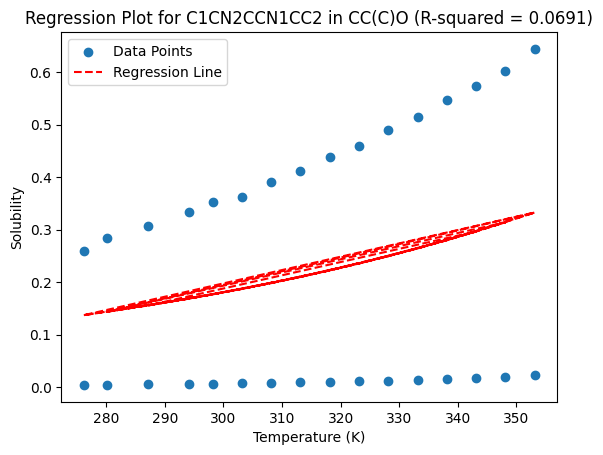

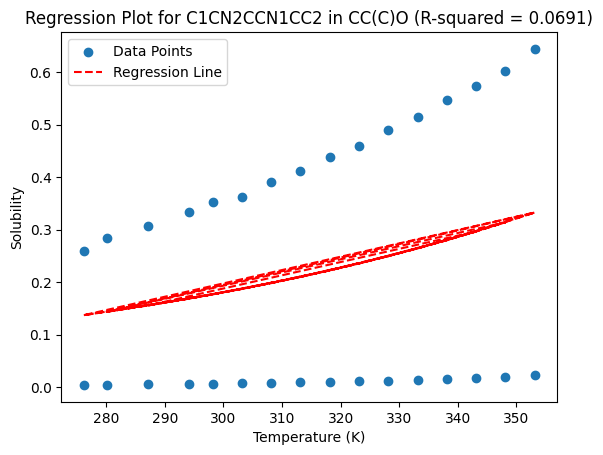

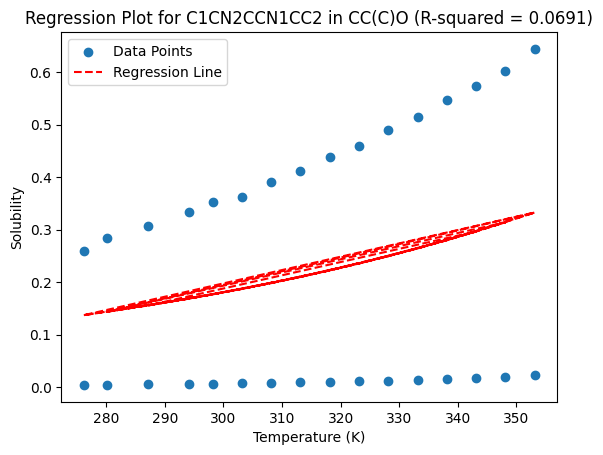

In [ ]:
import matplotlib.pyplot as plt

i = 0
# Iterate over rows in 'result_df'
for index, row in result_df.iterrows():
    if row['R-squared'] < 0.80:
        while i<3: # Increase this i to see more bad datap
            solute = row['SMILES']
            solvent = row['SMILES_Solvent']
            temp_values = df[(df['SMILES'] == solute) & (df['SMILES_Solvent'] == solvent)]['T,K'].values
            solubility_values = df[(df['SMILES'] == solute) & (df['SMILES_Solvent'] == solvent)]['Solubility'].values

            # Plot the scatter plot
            plt.scatter(temp_values, solubility_values, label='Data Points')

            # Fit the regression model
            coefficients = [row['a'], row['b']]

            # Plot the regression line
            plt.plot(temp_values, regression_function(temp_values, *coefficients), linestyle="dashed", color="red", label='Regression Line')

            plt.xlabel('Temperature (K)')
            plt.ylabel('Solubility')
            plt.title(f'Regression Plot for {solute} in {solvent} (R-squared = {row["R-squared"]:.4f})')
            plt.legend()
            plt.show()
            i+=1


In [ ]:
j = 0
for i in range(len(result_df)):
    if result_df.at[i, "R-squared"] < 0.80:
        j+= 1
print("Number of bad solute solvent pairs: "+ str(j))

print("% of bad data: " + str(j*100/len(result_df)))

Number of bad solute solvent pairs: 63
% of bad data: 1.1266094420600858


In [ ]:
new_df = result_df[result_df["R-squared"] >= 0.800]

# Create a new column in df1 to store solubility values
new_df['Closest_Solubility'] = None
new_df['LogS'] = None

# Iterate over rows in df1
for index, row in new_df.iterrows():
    solvent = row['SMILES_Solvent']
    solute = row['SMILES']

    # Filter df for the corresponding solvent and solute
    matching_rows = df[(df['SMILES_Solvent'] == solvent) & (df['SMILES'] == solute)]

    if not matching_rows.empty:
        # Find the row with the closest temperature to 273.15
        closest_row = matching_rows.loc[(matching_rows['T,K'] - 273.15).abs().idxmin()]

        # Assign the corresponding solubility to new_df
        new_df.at[index, 'Closest_Solubility'] = closest_row['Solubility']
        new_df.at[index, 'LogS'] = np.log10(closest_row['Solubility'])



<ipython-input-49-a737f39d2565>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Closest_Solubility'] = None
<ipython-input-49-a737f39d2565>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['LogS'] = None


In [ ]:
new_df["Smiles_Merged"] = None
indices_to_drop = []
new_df.reset_index(drop=True, inplace=True)
for i in range(len(new_df)):
    solvent = new_df.at[i, 'SMILES_Solvent']
    solute = new_df.at[i, 'SMILES']

    try:
        new_df.at[i, "Smiles_Merged"] = MolMerger(solute, solvent)
    except:
        indices_to_drop.append(i)

new_df.drop(index=new_df.index[indices_to_drop], inplace=True)
new_df.reset_index(drop=True, inplace=True)


<ipython-input-50-7dbe7e250467>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Smiles_Merged"] = None
<ipython-input-50-7dbe7e250467>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(index=new_df.index[indices_to_drop], inplace=True)


In [ ]:
bigsol = pd.DataFrame(columns=['Smiles_Solute', 'Smiles_Solvent', "Smiles_Merged", "LogS"])
bigsol["Smiles_Solute"] = new_df["SMILES"]
bigsol["Smiles_Solvent"] = new_df["SMILES_Solvent"]
bigsol["Smiles_Merged"] = new_df["Smiles_Merged"]
bigsol["LogS"] = new_df['LogS']

# Create an empty list to store indices of rows to drop
indices_to_drop = []

# Iterate through the DataFrame
for i in range(len(bigsol)):
    smiles = bigsol["Smiles_Merged"][i]
    mol = Chem.MolFromSmiles(smiles)

    # Check if molecule creation is unsuccessful
    if mol is None:
        # Append index to the list of rows to drop
        indices_to_drop.append(i)

# Drop rows with unsuccessful molecule creation
bigsol.drop(index=indices_to_drop, inplace=True)

# Reset the DataFrame index after dropping rows
bigsol.reset_index(drop=True, inplace=True)


In [ ]:
indices_to_drop = []

for i in range(len(bigsol)):
    feat = dc.feat.MolGraphConvFeaturizer(use_edges=True)
    try:
        feat(bigsol.at[i, "Smiles_Merged"])
    except Exception as e:
        # Add the index to the list of indices to drop
        indices_to_drop.append(i)

# Drop rows based on indices with exceptions
bigsol.drop(indices_to_drop, inplace=True)

# Reset the index
bigsol.reset_index(inplace=True, drop=True)


In [ ]:
Freq = bigsol.groupby('Smiles_Solvent')['Smiles_Solute'].nunique().reset_index(name='solute_freq')
Freq

,Smiles_Solvent,solute_freq
0,C1CCC2CCCCC2C1,2
1,C1CCCCC1,68
2,C1CCOC1,80
3,C1COCCN1,1
4,C1COCCO1,136
...,...,...
116,OCCO,54
117,OCCOCCO,4
118,OCc1ccccc1,3
119,c1ccccc1,2


In [ ]:
datafortrain = Freq[ Freq["solute_freq"] > 120 ]
BigSolDBTrain = bigsol[ bigsol["Smiles_Solvent"].isin(datafortrain["Smiles_Solvent"])]
BigSolDBTrain.drop(indices_to_drop, inplace=True)
BigSolDBTrain.reset_index(inplace=True, drop=True)
BigSolDBTrain["Source"] = "BigSolDB"

<ipython-input-79-a1b0536dc8d8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BigSolDBTrain.drop(indices_to_drop, inplace=True)
<ipython-input-79-a1b0536dc8d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BigSolDBTrain["Source"] = "BigSolDB"


In [ ]:
dataforeval = Freq[(2 < Freq["solute_freq"]) & (Freq["solute_freq"] < 120)]
EvalData = bigsol[ bigsol["Smiles_Solvent"].isin(dataforeval["Smiles_Solvent"]) ]
EvalData.drop(indices_to_drop, inplace=True)
EvalData.reset_index(inplace=True, drop=True)

<ipython-input-76-06eaaf787697>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EvalData.drop(indices_to_drop, inplace=True)


In [ ]:
BigSolDBTrain.to_csv("BigSolDBTrain.csv")
EvalData.to_csv("EvalData.csv")

##Delaney (Esol)

In [ ]:
df = pd.read_csv("delaney-processed (2).csv")

In [ ]:
esol = pd.DataFrame(columns=['Smiles_Solute', 'Smiles_Solvent', "Smiles_Merged", "LogS"])
esol["Smiles_Solute"] = df["smiles"]
esol["Smiles_Solvent"] = "O"
esol["LogS"] = df["measured log solubility in mols per litre"]

In [ ]:
esol["Smiles_Merged"] = None
indices_to_drop = []
esol.reset_index(drop=True, inplace=True)
for i in range(len(esol)):
    solvent = "O"
    solute = esol.at[i, 'Smiles_Solute']
    try:
        esol.at[i, "Smiles_Merged"] = MolMerger(solute, solvent)
    except:
        indices_to_drop.append(i)

esol.drop(index=new_df.index[indices_to_drop], inplace=True)
esol.reset_index(drop=True, inplace=True)

In [ ]:
indices_to_drop = []

# Iterate through the DataFrame
for i in range(len(esol)):
    smiles = esol["Smiles_Merged"][i]
    mol = Chem.MolFromSmiles(smiles)

    # Check if molecule creation is unsuccessful
    if mol is None:
        # Append index to the list of rows to drop
        indices_to_drop.append(i)

# Drop rows with unsuccessful molecule creation
esol.drop(index=indices_to_drop, inplace=True)

# Reset the DataFrame index after dropping rows
esol.reset_index(drop=True, inplace=True)

indices_to_drop = []

for i in range(len(esol)):
    feat = dc.feat.MolGraphConvFeaturizer(use_edges=True)
    try:
        feat(esol.at[i, "Smiles_Merged"])
    except Exception as e:
        # Add the index to the list of indices to drop
        indices_to_drop.append(i)

# Drop rows based on indices with exceptions
esol.drop(indices_to_drop, inplace=True)

# Reset the index
esol.reset_index(inplace=True, drop=True)


In [ ]:
esol["Source"] = "Esol"

In [ ]:
esol.to_csv("ESOLTrain.csv")

##NNLabs

### Import Training Dataset

In [ ]:
data = data[~data["SMILES"].str.contains("\.")]
data.reset_index(inplace = True, drop = True)
data

In [ ]:
data = data[data["SMILES_Solvent"] != "-"]
data.reset_index(inplace = True, drop = True)
data

In [ ]:
from google.colab import files

files.download("BigSolDBTrain.csv")
files.download("EvalData.csv")
files.download("ESOLTrain.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## BNN Labs

In [ ]:
def cleaner(df, solvent):
    data = pd.DataFrame(columns=['Smiles_Solute', 'Smiles_Solvent', "Smiles_Merged", "LogS"])
    data["Smiles_Solute"] = df["SMILES"]
    data["Smiles_Solvent"] = solvent
    data["LogS"] = df["LogS"]
    data["Smiles_Merged"] = None
    indices_to_drop = []
    data.reset_index(drop=True, inplace=True)
    for i in range(len(data)):
        solute = data.at[i, 'Smiles_Solute']
        try:
            data.at[i, "Smiles_Merged"] = MolMerger(solute, solvent)
        except:
            indices_to_drop.append(i)

    data.drop(indices_to_drop, inplace=True)
    data.reset_index(drop=True, inplace=True)

    indices_to_drop = []

    # Iterate through the DataFrame
    for i in range(len(data)):
        smiles = data["Smiles_Merged"][i]
        mol = Chem.MolFromSmiles(smiles)

        # Check if molecule creation is unsuccessful
        if mol is None:
            # Append index to the list of rows to drop
            indices_to_drop.append(i)

    # Drop rows with unsuccessful molecule creation
    data.drop(index=indices_to_drop, inplace=True)

    # Reset the DataFrame index after dropping rows
    data.reset_index(drop=True, inplace=True)

    indices_to_drop = []

    for i in range(len(data)):
        feat = dc.feat.MolGraphConvFeaturizer(use_edges=True)
        try:
            feat(data.at[i, "Smiles_Merged"])
        except Exception as e:
            # Add the index to the list of indices to drop
            indices_to_drop.append(i)

    # Drop rows based on indices with exceptions
    data.drop(indices_to_drop, inplace=True)

    # Reset the index
    data.reset_index(inplace=True, drop=True)
    return data

In [ ]:
acetone = cleaner(pd.read_csv("acetone_solubility_data.csv"), "CC(=O)C")
benzene = cleaner(pd.read_csv("benzene_solubility_data.csv"), "c1ccccc1")
ethanol = cleaner(pd.read_csv("ethanol_solubility_data.csv"), "CCO")

BNNLabsTrain = pd.concat([acetone, benzene, ethanol])
BNNLabsTrain.reset_index(inplace=True, drop=True)
BNNLabsTrain["Source"] = "BNNLabs"

In [ ]:
BNNLabsTrain.to_csv("BNNLabsTrain.csv")
from google.colab import files

files.download("BNNLabsTrain.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Merging Datasets

In [ ]:
bigsol = pd.read_csv("BigSolDBTrain.csv")
esol = pd.read_csv("ESOLTrain.csv")
bnn = pd.read_csv("BNNLabsTrain.csv")

In [ ]:
bigsol = bigsol[~(bigsol["Smiles_Merged"].isin(esol["Smiles_Merged"]) | bigsol["Smiles_Merged"].isin(bnn["Smiles_Merged"]))]

In [ ]:
bigsol.reset_index(drop = True, inplace = True)

In [ ]:
Train = pd.concat([bigsol, esol, bnn])
Train.reset_index(inplace=True, drop=True)

In [ ]:
Train = Train.drop(columns = ["Unnamed: 0"])

In [ ]:
Train.to_csv("Train.csv")

In [ ]:
from google.colab import files

files.download("Train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Visualisation

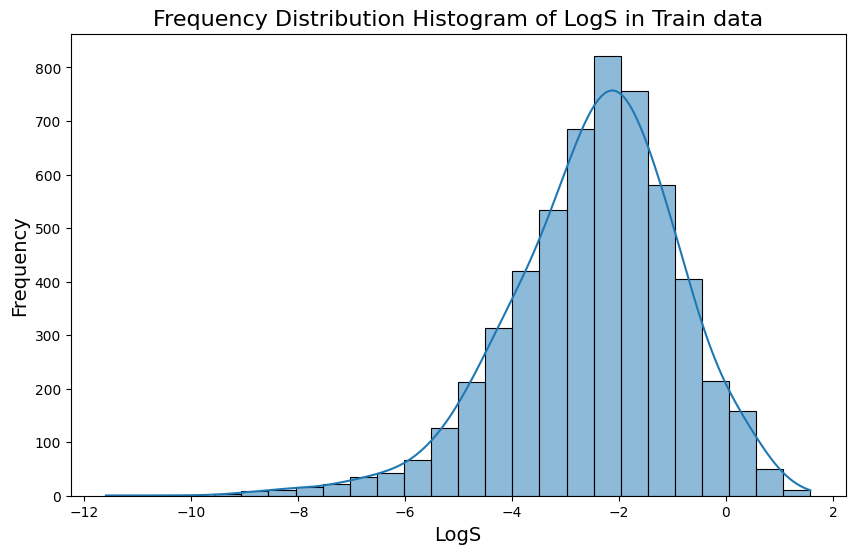

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Loading Dataset

df = pd.read_csv("Train.csv")
column_name = 'LogS'
bin_width = 0.5
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=int((df[column_name].max() - df[column_name].min()) / bin_width),
             kde=True, edgecolor='black', linewidth=0.8, kde_kws={'bw_method': 0.3}, line_kws={"color":"green"})  # Adjust the bandwidth and change color
plt.title('Frequency Distribution Histogram of LogS in Train data', fontsize=16)
plt.xlabel('LogS', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig("TrainFreqDist.png")
plt.show()


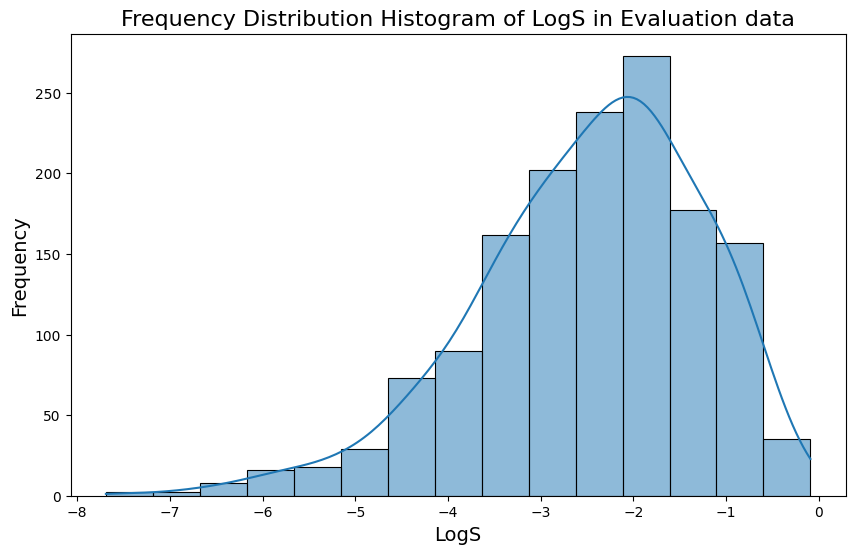

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("EvalData.csv")
column_name = 'LogS'
bin_width = 0.5
plt.figure(figsize=(10, 6))
sns.histplot(df[column_name], bins=int((df[column_name].max() - df[column_name].min()) / bin_width),
             kde=True, edgecolor='black', linewidth=0.8, kde_kws={'bw_method': 0.3}, line_kws={"color":"green"})  # Adjust the bandwidth and change color
plt.title('Frequency Distribution Histogram of LogS in Evaluation data', fontsize=16)
plt.xlabel('LogS', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.savefig("EvalFreqDist.png")
plt.show()


In [ ]:
df = pd.read_csv("Train.csv")
bigsol = len(df[df["Source"] == "BigSolDB" ])
bnnlabs = len(df[df["Source"] == "BNNLabs" ])
esol = len(df[df["Source"] == "Esol" ])
print(bigsol)
print(bnnlabs)
print(esol)

3428
1093
972


In [ ]:
result = df.groupby('Smiles_Solvent')['Smiles_Solute'].nunique().reset_index(name='solute_freq')
result

,Smiles_Solvent,solute_freq
0,C1COCCO1,136
1,CC#N,260
2,CC(=O)C,427
3,CC(C)=O,283
4,CC(C)O,366
5,CCCCO,282
6,CCCO,307
7,CCO,1107
8,CCOC(C)=O,360
9,CN(C)C=O,144


# Featuriser

This is the featurizer, which takes in RDKit mol and returns a DiskDataset object with input features ie edge and node.

In [ ]:
!pip install torch

In [ ]:
from typing import List, Tuple
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from deepchem.utils.typing import RDKitAtom, RDKitBond, RDKitMol
from deepchem.feat.graph_data import GraphData
from deepchem.feat.base_classes import MolecularFeaturizer
from deepchem.utils.molecule_feature_utils import one_hot_encode
from deepchem.utils.molecule_feature_utils import get_atom_type_one_hot
from deepchem.utils.molecule_feature_utils import construct_hydrogen_bonding_info
from deepchem.utils.molecule_feature_utils import get_atom_hydrogen_bonding_one_hot
from deepchem.utils.molecule_feature_utils import get_atom_hybridization_one_hot
from deepchem.utils.molecule_feature_utils import get_atom_total_num_Hs_one_hot
from deepchem.utils.molecule_feature_utils import get_atom_is_in_aromatic_one_hot
from deepchem.utils.molecule_feature_utils import get_atom_chirality_one_hot
from deepchem.utils.molecule_feature_utils import get_atom_formal_charge
from deepchem.utils.molecule_feature_utils import get_atom_partial_charge
from deepchem.utils.molecule_feature_utils import get_atom_total_degree_one_hot
from deepchem.utils.molecule_feature_utils import get_bond_type_one_hot
from deepchem.utils.molecule_feature_utils import get_bond_is_in_same_ring_one_hot
from deepchem.utils.molecule_feature_utils import get_bond_is_conjugated_one_hot
from deepchem.utils.molecule_feature_utils import get_bond_stereo_one_hot
from deepchem.utils.molecule_feature_utils import get_atom_formal_charge_one_hot
from deepchem.utils.molecule_feature_utils import get_atom_implicit_valence_one_hot
from deepchem.utils.molecule_feature_utils import get_atom_explicit_valence_one_hot
from deepchem.utils.molecule_feature_utils import get_bond_graph_distance_one_hot
from deepchem.utils.molecule_feature_utils import get_atom_chirality_one_hot
from deepchem.utils.rdkit_utils import compute_all_pairs_shortest_path
from deepchem.utils.rdkit_utils import compute_pairwise_ring_info


def _construct_atom_feature(atom: RDKitAtom, h_bond_infos: List[Tuple[int, str]]) -> np.ndarray:
    atom_type = get_atom_type_one_hot(atom)
    formal_charge = get_atom_formal_charge(atom)
    hybridization = get_atom_hybridization_one_hot(atom)
    acceptor_donor = get_atom_hydrogen_bonding_one_hot(atom, h_bond_infos)
    aromatic = get_atom_is_in_aromatic_one_hot(atom)
    degree = get_atom_total_degree_one_hot(atom)
    total_num_Hs = get_atom_total_num_Hs_one_hot(atom)
    chirality = get_atom_chirality_one_hot(atom)

    atom_feat = np.concatenate([
        atom_type, formal_charge, hybridization, acceptor_donor, aromatic,
        degree, total_num_Hs, chirality
    ])

    return atom_feat


def _construct_bond_feature(bond: RDKitBond, dist_matrix) -> np.ndarray:

    bond_type = get_bond_type_one_hot(bond)
    same_ring = get_bond_is_in_same_ring_one_hot(bond)
    conjugated = get_bond_is_conjugated_one_hot(bond)
    stereo = get_bond_stereo_one_hot(bond)
    dist = get_bond_graph_distance_one_hot(bond, graph_dist_matrix = dist_matrix)
    return np.concatenate([bond_type, same_ring, conjugated, stereo, dist])


class MolMergerFeaturizer(MolecularFeaturizer):

    def __init__(self,
                 use_edges: bool = False):

        self.use_edges = use_edges

    def _featurize(self, datapoint: RDKitMol, **kwargs) -> GraphData:

        assert datapoint.GetNumAtoms() > 1
        if 'mol' in kwargs:
            datapoint = kwargs.get("mol")
            raise DeprecationWarning(
                'Mol is being phased out as a parameter, please pass "datapoint" instead.'
            )


        # construct atom (node) feature
        h_bond_infos = construct_hydrogen_bonding_info(datapoint)
        dist_matrix = Chem.GetDistanceMatrix(datapoint)
        atom_features = np.asarray(
            [
                _construct_atom_feature(atom, h_bond_infos)
                for atom in datapoint.GetAtoms()
            ],
            dtype=float,
        )

        # construct edge (bond) index
        src, dest = [], []
        for bond in datapoint.GetBonds():
            # add edge list considering a directed graph
            start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
            src += [start, end]
            dest += [end, start]

        # construct edge (bond) feature
        bond_features = None
        if self.use_edges:
            features = []
            for bond in datapoint.GetBonds():
                features += 2 * [_construct_bond_feature(bond, dist_matrix)]
            bond_features = np.asarray(features, dtype=float)

        return GraphData(node_features=atom_features,
                         edge_index=np.asarray([src, dest], dtype=int),
                         edge_features=bond_features)


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


# Model

This is the model, based on
Pushing the Boundaries of Molecular Representation for Drug Discovery with the Graph Attention Mechanism, Z Xiong et al., 2020
Implemented by Amazon

In [ ]:
# -*- coding: utf-8 -*-
#
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0
#
# AttentiveFP
# pylint: disable= no-member, arguments-differ, invalid-name

import dgl.function as fn
import torch
import torch.nn as nn
import torch.nn.functional as F

from dgl.nn.pytorch import edge_softmax

__all__ = ['AttentiveFPGNN']

# pylint: disable=W0221, C0103, E1101
class AttentiveGRU1(nn.Module):
    """Update node features with attention and GRU.

    This will be used for incorporating the information of edge features
    into node features for message passing.

    Parameters
    ----------
    node_feat_size : int
        Size for the input node features.
    edge_feat_size : int
        Size for the input edge (bond) features.
    edge_hidden_size : int
        Size for the intermediate edge (bond) representations.
    dropout : float
        The probability for performing dropout.
    """
    def __init__(self, node_feat_size, edge_feat_size, edge_hidden_size, dropout):
        super(AttentiveGRU1, self).__init__()

        self.edge_transform = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(edge_feat_size, edge_hidden_size)
        )
        self.gru = nn.GRUCell(edge_hidden_size, node_feat_size)

    def reset_parameters(self):
        """Reinitialize model parameters."""
        self.edge_transform[1].reset_parameters()
        self.gru.reset_parameters()

    def forward(self, g, edge_logits, edge_feats, node_feats):
        """Update node representations.

        Parameters
        ----------
        g : DGLGraph
            DGLGraph for a batch of graphs
        edge_logits : float32 tensor of shape (E, 1)
            The edge logits based on which softmax will be performed for weighting
            edges within 1-hop neighborhoods. E represents the number of edges.
        edge_feats : float32 tensor of shape (E, edge_feat_size)
            Previous edge features.
        node_feats : float32 tensor of shape (V, node_feat_size)
            Previous node features. V represents the number of nodes.

        Returns
        -------
        float32 tensor of shape (V, node_feat_size)
            Updated node features.
        """
        g = g.local_var()
        g.edata['e'] = edge_softmax(g, edge_logits) * self.edge_transform(edge_feats)
        g.update_all(fn.copy_e('e', 'm'), fn.sum('m', 'c'))
        context = F.elu(g.ndata['c'])
        return F.relu(self.gru(context, node_feats))

class AttentiveGRU2(nn.Module):
    """Update node features with attention and GRU.

    This will be used in GNN layers for updating node representations.

    Parameters
    ----------
    node_feat_size : int
        Size for the input node features.
    edge_hidden_size : int
        Size for the intermediate edge (bond) representations.
    dropout : float
        The probability for performing dropout.
    """
    def __init__(self, node_feat_size, edge_hidden_size, dropout):
        super(AttentiveGRU2, self).__init__()

        self.project_node = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(node_feat_size, edge_hidden_size)
        )
        self.gru = nn.GRUCell(edge_hidden_size, node_feat_size)

    def reset_parameters(self):
        """Reinitialize model parameters."""
        self.project_node[1].reset_parameters()
        self.gru.reset_parameters()

    def forward(self, g, edge_logits, node_feats):
        """Update node representations.

        Parameters
        ----------
        g : DGLGraph
            DGLGraph for a batch of graphs
        edge_logits : float32 tensor of shape (E, 1)
            The edge logits based on which softmax will be performed for weighting
            edges within 1-hop neighborhoods. E represents the number of edges.
        node_feats : float32 tensor of shape (V, node_feat_size)
            Previous node features. V represents the number of nodes.

        Returns
        -------
        float32 tensor of shape (V, node_feat_size)
            Updated node features.
        """
        g = g.local_var()
        g.edata['a'] = edge_softmax(g, edge_logits)
        g.ndata['hv'] = self.project_node(node_feats)

        g.update_all(fn.u_mul_e('hv', 'a', 'm'), fn.sum('m', 'c'))
        context = F.elu(g.ndata['c'])
        return F.relu(self.gru(context, node_feats))

class GetContext(nn.Module):
    """Generate context for each node by message passing at the beginning.

    This layer incorporates the information of edge features into node
    representations so that message passing needs to be only performed over
    node representations.

    Parameters
    ----------
    node_feat_size : int
        Size for the input node features.
    edge_feat_size : int
        Size for the input edge (bond) features.
    graph_feat_size : int
        Size of the learned graph representation (molecular fingerprint).
    dropout : float
        The probability for performing dropout.
    """
    def __init__(self, node_feat_size, edge_feat_size, graph_feat_size, dropout):
        super(GetContext, self).__init__()

        self.project_node = nn.Sequential(
            nn.Linear(node_feat_size, graph_feat_size),
            nn.LeakyReLU()
        )
        self.project_edge1 = nn.Sequential(
            nn.Linear(node_feat_size + edge_feat_size, graph_feat_size),
            nn.LeakyReLU()
        )
        self.project_edge2 = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(2 * graph_feat_size, 1),
            nn.LeakyReLU()
        )
        self.attentive_gru = AttentiveGRU1(graph_feat_size, graph_feat_size,
                                           graph_feat_size, dropout)

    def reset_parameters(self):
        """Reinitialize model parameters."""
        self.project_node[0].reset_parameters()
        self.project_edge1[0].reset_parameters()
        self.project_edge2[1].reset_parameters()
        self.attentive_gru.reset_parameters()

    def apply_edges1(self, edges):
        """Edge feature update.

        Parameters
        ----------
        edges : EdgeBatch
            Container for a batch of edges

        Returns
        -------
        dict
            Mapping ``'he1'`` to updated edge features.
        """
        return {'he1': torch.cat([edges.src['hv'], edges.data['he']], dim=1)}

    def apply_edges2(self, edges):
        """Edge feature update.

        Parameters
        ----------
        edges : EdgeBatch
            Container for a batch of edges

        Returns
        -------
        dict
            Mapping ``'he2'`` to updated edge features.
        """
        return {'he2': torch.cat([edges.dst['hv_new'], edges.data['he1']], dim=1)}

    def forward(self, g, node_feats, edge_feats):
        """Incorporate edge features and update node representations.

        Parameters
        ----------
        g : DGLGraph
            DGLGraph for a batch of graphs.
        node_feats : float32 tensor of shape (V, node_feat_size)
            Input node features. V for the number of nodes.
        edge_feats : float32 tensor of shape (E, edge_feat_size)
            Input edge features. E for the number of edges.

        Returns
        -------
        float32 tensor of shape (V, graph_feat_size)
            Updated node features.
        """
        g = g.local_var()
        g.ndata['hv'] = node_feats
        g.ndata['hv_new'] = self.project_node(node_feats)
        g.edata['he'] = edge_feats

        g.apply_edges(self.apply_edges1)
        g.edata['he1'] = self.project_edge1(g.edata['he1'])
        g.apply_edges(self.apply_edges2)
        logits = self.project_edge2(g.edata['he2'])

        return self.attentive_gru(g, logits, g.edata['he1'], g.ndata['hv_new'])

class GNNLayer(nn.Module):
    """GNNLayer for updating node features.

    This layer performs message passing over node representations and update them.

    Parameters
    ----------
    node_feat_size : int
        Size for the input node features.
    graph_feat_size : int
        Size for the graph representations to be computed.
    dropout : float
        The probability for performing dropout.
    """
    def __init__(self, node_feat_size, graph_feat_size, dropout):
        super(GNNLayer, self).__init__()

        self.project_edge = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(2 * node_feat_size, 1),
            nn.LeakyReLU()
        )
        self.attentive_gru = AttentiveGRU2(node_feat_size, graph_feat_size, dropout)

    def reset_parameters(self):
        """Reinitialize model parameters."""
        self.project_edge[1].reset_parameters()
        self.attentive_gru.reset_parameters()

    def apply_edges(self, edges):
        """Edge feature generation.

        Generate edge features by concatenating the features of the destination
        and source nodes.

        Parameters
        ----------
        edges : EdgeBatch
            Container for a batch of edges.

        Returns
        -------
        dict
            Mapping ``'he'`` to the generated edge features.
        """
        return {'he': torch.cat([edges.dst['hv'], edges.src['hv']], dim=1)}

    def forward(self, g, node_feats):
        """Perform message passing and update node representations.

        Parameters
        ----------
        g : DGLGraph
            DGLGraph for a batch of graphs.
        node_feats : float32 tensor of shape (V, node_feat_size)
            Input node features. V for the number of nodes.

        Returns
        -------
        float32 tensor of shape (V, graph_feat_size)
            Updated node features.
        """
        g = g.local_var()
        g.ndata['hv'] = node_feats
        g.apply_edges(self.apply_edges)
        logits = self.project_edge(g.edata['he'])

        return self.attentive_gru(g, logits, node_feats)

class AttentiveFPGNN(nn.Module):
    """`Pushing the Boundaries of Molecular Representation for Drug Discovery with the Graph
    Attention Mechanism <https://www.ncbi.nlm.nih.gov/pubmed/31408336>`__

    This class performs message passing in AttentiveFP and returns the updated node representations.

    Parameters
    ----------
    node_feat_size : int
        Size for the input node features.
    edge_feat_size : int
        Size for the input edge features.
    num_layers : int
        Number of GNN layers. Default to 2.
    graph_feat_size : int
        Size for the graph representations to be computed. Default to 200.
    dropout : float
        The probability for performing dropout. Default to 0.
    """
    def __init__(self,
                 node_feat_size,
                 edge_feat_size,
                 num_layers=2,
                 graph_feat_size=200,
                 dropout=0.):
        super(AttentiveFPGNN, self).__init__()

        self.init_context = GetContext(node_feat_size, edge_feat_size, graph_feat_size, dropout)
        self.gnn_layers = nn.ModuleList()
        for _ in range(num_layers - 1):
            self.gnn_layers.append(GNNLayer(graph_feat_size, graph_feat_size, dropout))

    def reset_parameters(self):
        """Reinitialize model parameters."""
        self.init_context.reset_parameters()
        for gnn in self.gnn_layers:
            gnn.reset_parameters()

    def forward(self, g, node_feats, edge_feats):
        """Performs message passing and updates node representations.

        Parameters
        ----------
        g : DGLGraph
            DGLGraph for a batch of graphs.
        node_feats : float32 tensor of shape (V, node_feat_size)
            Input node features. V for the number of nodes.
        edge_feats : float32 tensor of shape (E, edge_feat_size)
            Input edge features. E for the number of edges.

        Returns
        -------
        node_feats : float32 tensor of shape (V, graph_feat_size)
            Updated node representations.
        """
        node_feats = self.init_context(g, node_feats, edge_feats)
        for gnn in self.gnn_layers:
            node_feats = gnn(g, node_feats)
        return node_feats

In [ ]:
!pip install --upgrade torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.7 MB/s eta 0:00:00
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.1/168.1 MB 4.6 MB/s eta 0:00:00
  Attempting uninstall: triton
    Found existing installation: triton 2.2.0
    Uninstalling triton-2.2.0:
      Successfully uninstalled triton-2.2.0
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.19.3
    Uninstalling nvidia-nccl-cu12-2.19.3:
      Successfully uninstalled nvidia-nccl-cu12-2.19.3
  Attempting uninstall: torch
    Found existing installation: torch 2.2.0
ERROR: Operation cancelled by user


In [ ]:
# -*- coding: utf-8 -*-
#
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0
#
# Readout for AttentiveFP
# pylint: disable= no-member, arguments-differ, invalid-name

import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F

__all__ = ['AttentiveFPReadout']

# pylint: disable=W0221
class GlobalPool(nn.Module):
    """One-step readout in AttentiveFP

    Parameters
    ----------
    feat_size : int
        Size for the input node features, graph features and output graph
        representations.
    dropout : float
        The probability for performing dropout.
    """
    def __init__(self, feat_size, dropout):
        super(GlobalPool, self).__init__()

        self.compute_logits = nn.Sequential(
            nn.Linear(2 * feat_size, 1),
            nn.LeakyReLU()
        )
        self.project_nodes = nn.Sequential(
            nn.Dropout(dropout),
            nn.Linear(feat_size, feat_size)
        )
        self.gru = nn.GRUCell(feat_size, feat_size)

    def forward(self, g, node_feats, g_feats, get_node_weight=False):
        """Perform one-step readout

        Parameters
        ----------
        g : DGLGraph
            DGLGraph for a batch of graphs.
        node_feats : float32 tensor of shape (V, node_feat_size)
            Input node features. V for the number of nodes.
        g_feats : float32 tensor of shape (G, graph_feat_size)
            Input graph features. G for the number of graphs.
        get_node_weight : bool
            Whether to get the weights of atoms during readout.

        Returns
        -------
        float32 tensor of shape (G, graph_feat_size)
            Updated graph features.
        float32 tensor of shape (V, 1)
            The weights of nodes in readout.
        """
        with g.local_scope():
            g.ndata['z'] = self.compute_logits(
                torch.cat([dgl.broadcast_nodes(g, F.relu(g_feats)), node_feats], dim=1))
            g.ndata['a'] = dgl.softmax_nodes(g, 'z')
            g.ndata['hv'] = self.project_nodes(node_feats)

            g_repr = dgl.sum_nodes(g, 'hv', 'a')
            context = F.elu(g_repr)

            if get_node_weight:
                return self.gru(context, g_feats), g.ndata['a']
            else:
                return self.gru(context, g_feats)

class AttentiveFPReadout(nn.Module):
    """Readout in AttentiveFP

    AttentiveFP is introduced in `Pushing the Boundaries of Molecular Representation for
    Drug Discovery with the Graph Attention Mechanism
    <https://www.ncbi.nlm.nih.gov/pubmed/31408336>`__

    This class computes graph representations out of node features.

    Parameters
    ----------
    feat_size : int
        Size for the input node features, graph features and output graph
        representations.
    num_timesteps : int
        Times of updating the graph representations with GRU. Default to 2.
    dropout : float
        The probability for performing dropout. Default to 0.
    """
    def __init__(self, feat_size, num_timesteps=2, dropout=0.):
        super(AttentiveFPReadout, self).__init__()

        self.readouts = nn.ModuleList()
        for _ in range(num_timesteps):
            self.readouts.append(GlobalPool(feat_size, dropout))

    def forward(self, g, node_feats, get_node_weight=False):
        """Computes graph representations out of node features.

        Parameters
        ----------
        g : DGLGraph
            DGLGraph for a batch of graphs.
        node_feats : float32 tensor of shape (V, node_feat_size)
            Input node features. V for the number of nodes.
        get_node_weight : bool
            Whether to get the weights of nodes in readout. Default to False.

        Returns
        -------
        g_feats : float32 tensor of shape (G, graph_feat_size)
            Graph representations computed. G for the number of graphs.
        node_weights : list of float32 tensor of shape (V, 1), optional
            This is returned when ``get_node_weight`` is ``True``.
            The list has a length ``num_timesteps`` and ``node_weights[i]``
            gives the node weights in the i-th update.
        """
        with g.local_scope():
            g.ndata['hv'] = node_feats
            g_feats = dgl.sum_nodes(g, 'hv')

        if get_node_weight:
            node_weights = []

        for readout in self.readouts:
            if get_node_weight:
                g_feats, node_weights_t = readout(g, node_feats, g_feats, get_node_weight)
                node_weights.append(node_weights_t)
            else:
                g_feats = readout(g, node_feats, g_feats)

        if get_node_weight:
            return g_feats, node_weights
        else:
            return g_feats

In [ ]:
# -*- coding: utf-8 -*-
#
# Copyright Amazon.com, Inc. or its affiliates. All Rights Reserved.
# SPDX-License-Identifier: Apache-2.0
#
# AttentiveFP
# pylint: disable= no-member, arguments-differ, invalid-name

import torch.nn as nn


__all__ = ['AttentiveFPPredictor']

# pylint: disable=W0221
class AttentiveFPPredictor(nn.Module):
    """AttentiveFP for regression and classification on graphs.

    AttentiveFP is introduced in
    `Pushing the Boundaries of Molecular Representation for Drug Discovery with the Graph
    Attention Mechanism. <https://www.ncbi.nlm.nih.gov/pubmed/31408336>`__

    Parameters
    ----------
    node_feat_size : int
        Size for the input node features.
    edge_feat_size : int
        Size for the input edge features.
    num_layers : int
        Number of GNN layers. Default to 2.
    num_timesteps : int
        Times of updating the graph representations with GRU. Default to 2.
    graph_feat_size : int
        Size for the learned graph representations. Default to 200.
    n_tasks : int
        Number of tasks, which is also the output size. Default to 1.
    dropout : float
        Probability for performing the dropout. Default to 0.
    """
    def __init__(self,
                 node_feat_size,
                 edge_feat_size,
                 num_layers=2,
                 num_timesteps=2,
                 graph_feat_size=200,
                 n_tasks=1,
                 dropout=0.):
        super(AttentiveFPPredictor, self).__init__()

        self.gnn = AttentiveFPGNN(node_feat_size=node_feat_size,
                                  edge_feat_size=edge_feat_size,
                                  num_layers=num_layers,
                                  graph_feat_size=graph_feat_size,
                                  dropout=dropout)
        self.readout = AttentiveFPReadout(feat_size=graph_feat_size,
                                          num_timesteps=num_timesteps,
                                          dropout=dropout)
        self.predict = nn.Sequential(
            nn.Dropout(dropout),

            nn.Linear(graph_feat_size, n_tasks)
        )

    def forward(self, g, node_feats, edge_feats, get_node_weight=False):
        """Graph-level regression/soft classification.

        Parameters
        ----------
        g : DGLGraph
            DGLGraph for a batch of graphs.
        node_feats : float32 tensor of shape (V, node_feat_size)
            Input node features. V for the number of nodes.
        edge_feats : float32 tensor of shape (E, edge_feat_size)
            Input edge features. E for the number of edges.
        get_node_weight : bool
            Whether to get the weights of atoms during readout. Default to False.

        Returns
        -------
        float32 tensor of shape (G, n_tasks)
            Prediction for the graphs in the batch. G for the number of graphs.
        node_weights : list of float32 tensor of shape (V, 1), optional
            This is returned when ``get_node_weight`` is ``True``.
            The list has a length ``num_timesteps`` and ``node_weights[i]``
            gives the node weights in the i-th update.
        """
        node_feats = self.gnn(g, node_feats, edge_feats)
        if get_node_weight:
            g_feats, node_weights = self.readout(g, node_feats, get_node_weight)
            return self.predict(g_feats), node_weights
        else:
            g_feats = self.readout(g, node_feats, get_node_weight)
            return self.predict(g_feats)

In [ ]:
"""
DGL-based AttentiveFP for graph property prediction.
"""
import torch.nn as nn
import torch.nn.functional as F

from deepchem.models.losses import Loss, L2Loss, SparseSoftmaxCrossEntropy
from deepchem.models.torch_models.torch_model import TorchModel


class AttentiveFP(nn.Module):
    """Model for Graph Property Prediction.

    This model proceeds as follows:

    * Combine node features and edge features for initializing node representations,
        which involves a round of message passing
    * Update node representations with multiple rounds of message passing
    * For each graph, compute its representation by combining the representations
        of all nodes in it, which involves a gated recurrent unit (GRU).
    * Perform the final prediction using a linear layer

    Examples
    --------

    >>> import deepchem as dc
    >>> import dgl
    >>> from deepchem.models import AttentiveFP
    >>> smiles = ["C1CCC1", "C1=CC=CN=C1"]
    >>> featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
    >>> graphs = featurizer.featurize(smiles)
    >>> print(type(graphs[0]))
    <class 'deepchem.feat.graph_data.GraphData'>
    >>> dgl_graphs = [graphs[i].to_dgl_graph(self_loop=True) for i in range(len(graphs))]
    >>> # Batch two graphs into a graph of two connected components
    >>> batch_dgl_graph = dgl.batch(dgl_graphs)
    >>> model = AttentiveFP(n_tasks=1, mode='regression')
    >>> preds = model(batch_dgl_graph)
    >>> print(type(preds))
    <class 'torch.Tensor'>
    >>> preds.shape == (2, 1)
    True

    References
    ----------
    .. [1] Zhaoping Xiong, Dingyan Wang, Xiaohong Liu, Feisheng Zhong, Xiaozhe Wan, Xutong Li,
        Zhaojun Li, Xiaomin Luo, Kaixian Chen, Hualiang Jiang, and Mingyue Zheng. "Pushing
        the Boundaries of Molecular Representation for Drug Discovery with the Graph Attention
        Mechanism." Journal of Medicinal Chemistry. 2020, 63, 16, 8749–8760.

    Notes
    -----
    This class requires DGL (https://github.com/dmlc/dgl) and DGL-LifeSci
    (https://github.com/awslabs/dgl-lifesci) to be installed.
    """

    def __init__(self,
                 n_tasks: int,
                 num_layers: int = 2,
                 num_timesteps: int = 2,
                 graph_feat_size: int = 200,
                 dropout: float = 0.,
                 mode: str = 'regression',
                 number_atom_features: int = 32,
                 number_bond_features: int = 19,
                 n_classes: int = 2,
                 nfeat_name: str = 'x',
                 efeat_name: str = 'edge_attr'):
        """
        Parameters
        ----------
        n_tasks: int
            Number of tasks.
        num_layers: int
            Number of graph neural network layers, i.e. number of rounds of message passing.
            Default to 2.
        num_timesteps: int
            Number of time steps for updating graph representations with a GRU. Default to 2.
        graph_feat_size: int
            Size for graph representations. Default to 200.
        dropout: float
            Dropout probability. Default to 0.
        mode: str
            The model type, 'classification' or 'regression'. Default to 'regression'.
        number_atom_features: int
            The length of the initial atom feature vectors. Default to 30.
        number_bond_features: int
            The length of the initial bond feature vectors. Default to 11.
        n_classes: int
            The number of classes to predict per task
            (only used when ``mode`` is 'classification'). Default to 2.
        nfeat_name: str
            For an input graph ``g``, the model assumes that it stores node features in
            ``g.ndata[nfeat_name]`` and will retrieve input node features from that.
            Default to 'x'.
        efeat_name: str
            For an input graph ``g``, the model assumes that it stores edge features in
            ``g.edata[efeat_name]`` and will retrieve input edge features from that.
            Default to 'edge_attr'.
        """
        try:
            import dgl  # noqa: F401
        except:
            raise ImportError('This class requires dgl.')
        try:
            import dgllife  # noqa: F401
        except:
            raise ImportError('This class requires dgllife.')

        if mode not in ['classification', 'regression']:
            raise ValueError(
                "mode must be either 'classification' or 'regression'")

        super(AttentiveFP, self).__init__()

        self.n_tasks = n_tasks
        self.mode = mode
        self.n_classes = n_classes
        self.nfeat_name = nfeat_name
        self.efeat_name = efeat_name
        if mode == 'classification':
            out_size = n_tasks * n_classes
        else:
            out_size = n_tasks


        self.model = AttentiveFPPredictor(
            node_feat_size=number_atom_features,
            edge_feat_size=number_bond_features,
            num_layers=num_layers,
            num_timesteps=num_timesteps,
            graph_feat_size=graph_feat_size,
            n_tasks=out_size,
            dropout=dropout)

    def forward(self, g):
        """Predict graph labels

        Parameters
        ----------
        g: DGLGraph
            A DGLGraph for a batch of graphs. It stores the node features in
            ``dgl_graph.ndata[self.nfeat_name]`` and edge features in
            ``dgl_graph.edata[self.efeat_name]``.

        Returns
        -------
        torch.Tensor
            The model output.

        * When self.mode = 'regression',
            its shape will be ``(dgl_graph.batch_size, self.n_tasks)``.
        * When self.mode = 'classification', the output consists of probabilities
            for classes. Its shape will be
            ``(dgl_graph.batch_size, self.n_tasks, self.n_classes)`` if self.n_tasks > 1;
            its shape will be ``(dgl_graph.batch_size, self.n_classes)`` if self.n_tasks is 1.
        torch.Tensor, optional
            This is only returned when self.mode = 'classification', the output consists of the
            logits for classes before softmax.
        """
        node_feats = g.ndata[self.nfeat_name]
        edge_feats = g.edata[self.efeat_name]
        out = self.model(g, node_feats, edge_feats)

        if self.mode == 'classification':
            if self.n_tasks == 1:
                logits = out.view(-1, self.n_classes)
                softmax_dim = 1
            else:
                logits = out.view(-1, self.n_tasks, self.n_classes)
                softmax_dim = 2
            proba = F.softmax(logits, dim=softmax_dim)
            return proba, logits
        else:
            return out


class AttentiveFPModel(TorchModel):
    """Model for Graph Property Prediction.

    This model proceeds as follows:

    * Combine node features and edge features for initializing node representations,
        which involves a round of message passing
    * Update node representations with multiple rounds of message passing
    * For each graph, compute its representation by combining the representations
        of all nodes in it, which involves a gated recurrent unit (GRU).
    * Perform the final prediction using a linear layer

    Examples
    --------
    >>> import deepchem as dc
    >>> from deepchem.models import AttentiveFPModel
    >>> # preparing dataset
    >>> smiles = ["C1CCC1", "C1=CC=CN=C1"]
    >>> labels = [0., 1.]
    >>> featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
    >>> X = featurizer.featurize(smiles)
    >>> dataset = dc.data.NumpyDataset(X=X, y=labels)
    >>> # training model
    >>> model = AttentiveFPModel(mode='classification', n_tasks=1,
    ...    batch_size=16, learning_rate=0.001)
    >>> loss = model.fit(dataset, nb_epoch=5)

    References
    ----------
    .. [1] Zhaoping Xiong, Dingyan Wang, Xiaohong Liu, Feisheng Zhong, Xiaozhe Wan, Xutong Li,
        Zhaojun Li, Xiaomin Luo, Kaixian Chen, Hualiang Jiang, and Mingyue Zheng. "Pushing
        the Boundaries of Molecular Representation for Drug Discovery with the Graph
        Attention Mechanism." Journal of Medicinal Chemistry. 2020, 63, 16, 8749–8760.

    Notes
    -----
    This class requires DGL (https://github.com/dmlc/dgl) and DGL-LifeSci
    (https://github.com/awslabs/dgl-lifesci) to be installed.
    """

    def __init__(self,
                 n_tasks: int,
                 num_layers: int = 2,
                 num_timesteps: int = 2,
                 graph_feat_size: int = 200,
                 dropout: float = 0.,
                 mode: str = 'regression',
                 number_atom_features: int = 32,
                 number_bond_features: int = 19,
                 n_classes: int = 2,
                 self_loop: bool = True,
                 **kwargs):
        """
        Parameters
        ----------
        n_tasks: int
            Number of tasks.
        num_layers: int
            Number of graph neural network layers, i.e. number of rounds of message passing.
            Default to 2.
        num_timesteps: int
            Number of time steps for updating graph representations with a GRU. Default to 2.
        graph_feat_size: int
            Size for graph representations. Default to 200.
        dropout: float
            Dropout probability. Default to 0.
        mode: str
            The model type, 'classification' or 'regression'. Default to 'regression'.
        number_atom_features: int
            The length of the initial atom feature vectors. Default to 30.
        number_bond_features: int
            The length of the initial bond feature vectors. Default to 11.
        n_classes: int
            The number of classes to predict per task
            (only used when ``mode`` is 'classification'). Default to 2.
        self_loop: bool
            Whether to add self loops for the nodes, i.e. edges from nodes to themselves.
            When input graphs have isolated nodes, self loops allow preserving the original feature
            of them in message passing. Default to True.
        kwargs
            This can include any keyword argument of TorchModel.
        """
        model = AttentiveFP(n_tasks=n_tasks,
                            num_layers=num_layers,
                            num_timesteps=num_timesteps,
                            graph_feat_size=graph_feat_size,
                            dropout=dropout,
                            mode=mode,
                            number_atom_features=number_atom_features,
                            number_bond_features=number_bond_features,
                            n_classes=n_classes)
        if mode == 'regression':
            loss: Loss = L2Loss()
            output_types = ['prediction']
        else:
            loss = SparseSoftmaxCrossEntropy()
            output_types = ['prediction', 'loss']
        super(AttentiveFPModel, self).__init__(model,
                                               loss=loss,
                                               output_types=output_types,
                                               **kwargs)

        self._self_loop = self_loop

    def _prepare_batch(self, batch):
        """Create batch data for AttentiveFP.

        Parameters
        ----------
        batch: tuple
            The tuple is ``(inputs, labels, weights)``.

        Returns
        -------
        inputs: DGLGraph
            DGLGraph for a batch of graphs.
        labels: list of torch.Tensor or None
            The graph labels.
        weights: list of torch.Tensor or None
            The weights for each sample or sample/task pair converted to torch.Tensor.
        """
        try:
            import dgl
        except:
            raise ImportError('This class requires dgl.')

        inputs, labels, weights = batch
        dgl_graphs = [
            graph.to_dgl_graph(self_loop=self._self_loop) for graph in inputs[0]
        ]
        inputs = dgl.batch(dgl_graphs).to(self.device)
        _, labels, weights = super(AttentiveFPModel, self)._prepare_batch(
            ([], labels, weights))
        return inputs, labels, weights

# Data Split and Model Prepare

In [ ]:
import pandas as pd

In [ ]:
import deepchem as dc
task = ["LogS"]
featurizer = MolMergerFeaturizer( use_edges = True)
dataset_file = "trainset.csv"

loader = dc.data.CSVLoader(
    tasks = task,
    smiles_field = "Smiles_Merged",
    featurizer = featurizer
)

dataset = loader.featurize(dataset_file, shard_size = 8192 )

splitter = dc.splits.IndexSplitter()

train , test = splitter.train_test_split(dataset, seed = 42)

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


In [ ]:
import deepchem as dc
import numpy as np
metric1 = dc.metrics.Metric(dc.metrics.pearson_r2_score, np.mean)
metric2 = dc.metrics.Metric(dc.metrics.rms_score, np.mean)
metrics = [metric1, metric2]
batchsize = 128
model = AttentiveFPModel(
    n_tasks = 1,
    mode = "regression",
    num_layers = 3,
    dropout = 0.2,
    num_timesteps = 3
)

Run this cell if training from scratch else Skip and Restore from pretrained model availible in supporting information

In [ ]:
test_rms = []
train_rms = []
test_r2 = []
train_r2 = []
while i < 70:
    model.fit(train, nb_epoch = 1)
    train_score = model.evaluate(train, metrics)
    test_score = model.evaluate(test, metrics)
    train_rms.append(train_score['mean-rms_score'])
    test_rms.append(test_score['mean-rms_score'])
    print(test_score)
    train_r2.append(train_score['mean-pearson_r2_score'])
    test_r2.append(test_score['mean-pearson_r2_score'])
    print(test_score)
    if i>30 and test_rms[-1]- test_rms[-2] > 0.3:
        i = 75
    else:
        i+=1

model.save_checkpoint(model_dir = "/content/save2.pt")
print("trained at total epochs: " +str(i))


{'mean-pearson_r2_score': 0.7517289068666664, 'mean-rms_score': 0.8053310330326888}
{'mean-pearson_r2_score': 0.7517289068666664, 'mean-rms_score': 0.8053310330326888}
{'mean-pearson_r2_score': 0.7438121479676385, 'mean-rms_score': 0.8169173953454315}
{'mean-pearson_r2_score': 0.7438121479676385, 'mean-rms_score': 0.8169173953454315}
{'mean-pearson_r2_score': 0.7424349020829599, 'mean-rms_score': 0.8277150629415602}
{'mean-pearson_r2_score': 0.7424349020829599, 'mean-rms_score': 0.8277150629415602}
{'mean-pearson_r2_score': 0.7426543401621881, 'mean-rms_score': 0.8213403082806325}
{'mean-pearson_r2_score': 0.7426543401621881, 'mean-rms_score': 0.8213403082806325}
{'mean-pearson_r2_score': 0.7595532817618417, 'mean-rms_score': 0.7977048213924072}
{'mean-pearson_r2_score': 0.7595532817618417, 'mean-rms_score': 0.7977048213924072}
{'mean-pearson_r2_score': 0.7540572191526007, 'mean-rms_score': 0.8100018997091928}
{'mean-pearson_r2_score': 0.7540572191526007, 'mean-rms_score': 0.8100018997

In [ ]:
model.restore("/content/FinalTrainedModel.pt")

# Model Evaluate and Results

R2 score is {'mean-pearson_r2_score': 0.7669856195186637}


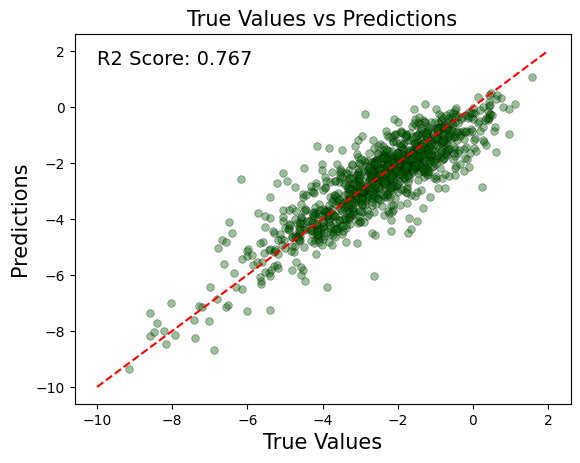

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(test)
y_real = test.y
train_score = model.evaluate(test, [metric1])
r2 = train_score['mean-pearson_r2_score']
print(f"R2 score is {train_score}")
plt.scatter(y_real, y_pred, s=30, alpha=0.4, color="darkgreen", edgecolor='black', linewidth=0.5)
plt.plot([-10, 2], [-10, 2], linestyle="dashed", color="red")

# Adding text with R2 score
plt.text(-10, 1.5, f'R2 Score: {str(round(r2, 3))}', fontsize=14, color='black')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('True Values vs Predictions', fontsize=15)
plt.savefig("TestEval.png")
plt.show()

In [ ]:
import pandas as pd
df = pd.read_csv("EvalData.csv")
df_sorted = pd.read_csv("Results.csv") # Just for names of solvents in sorted order for better visualisation, replace "a" and "names" with df[Smiles_Solvent] and df[Smiles_Name]

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


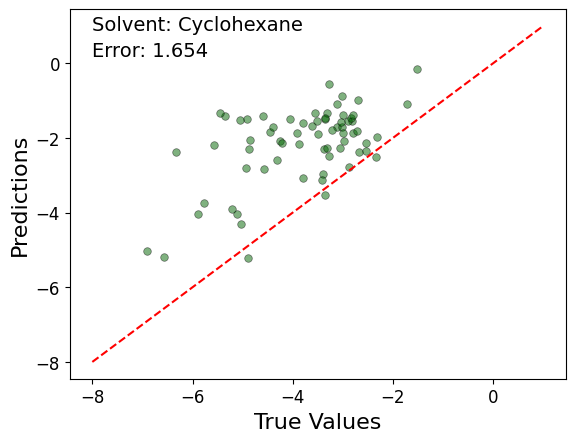

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


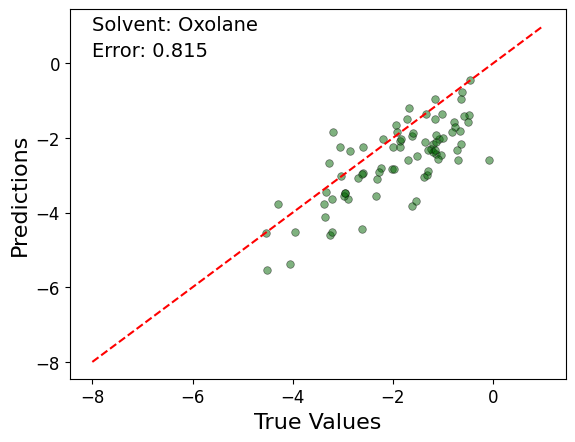

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


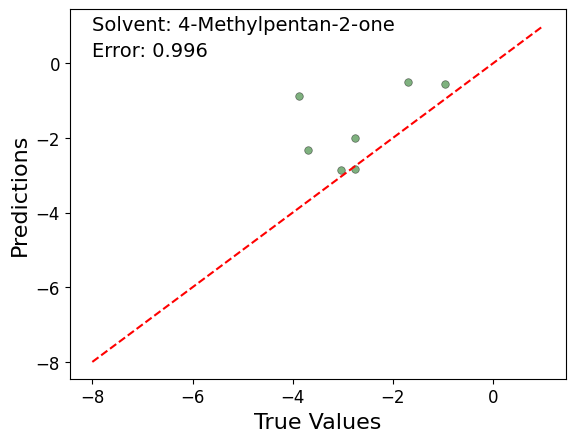

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


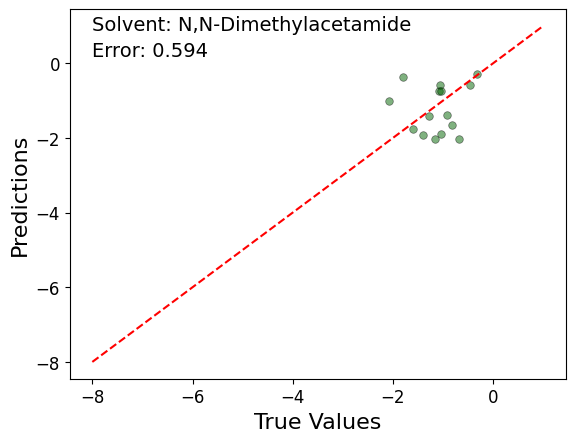

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


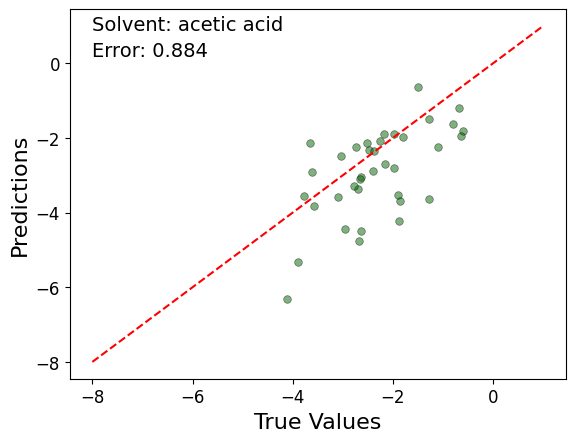

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


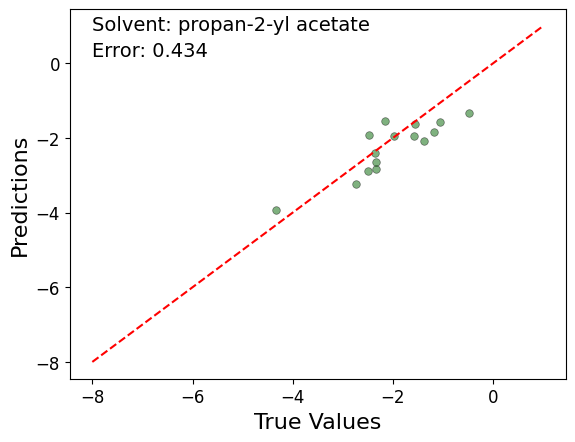

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


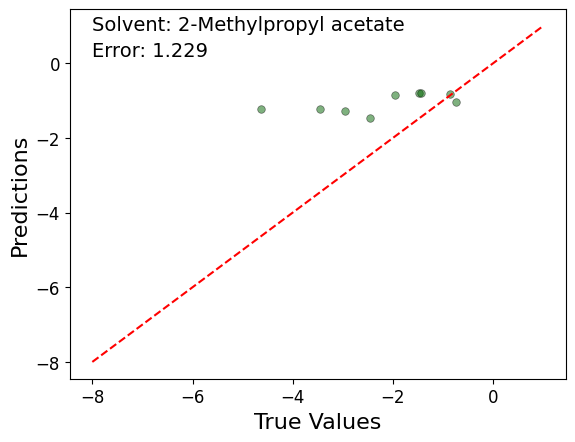

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


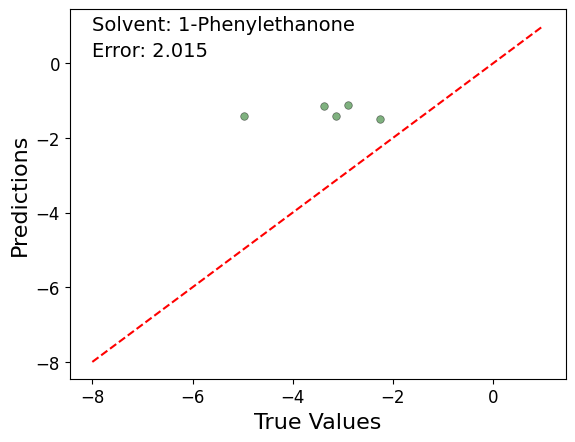

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


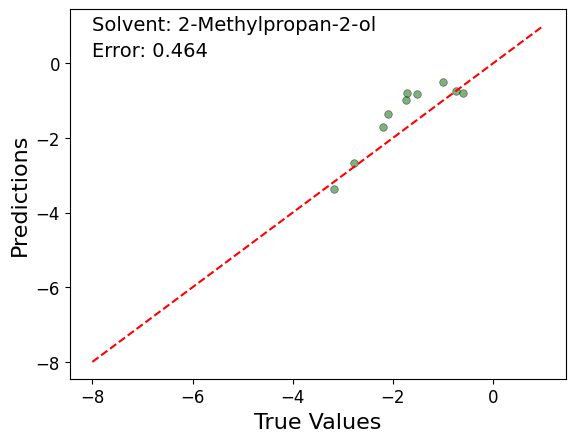

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


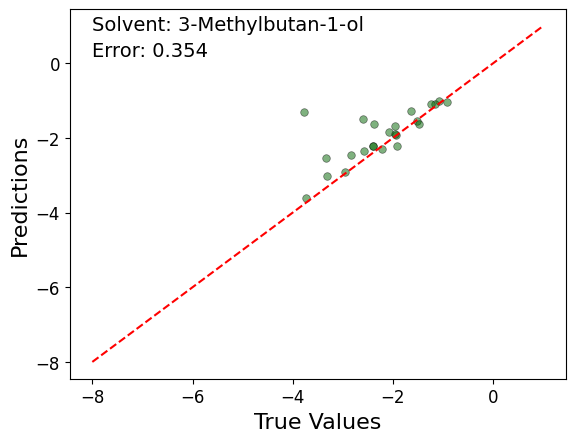

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


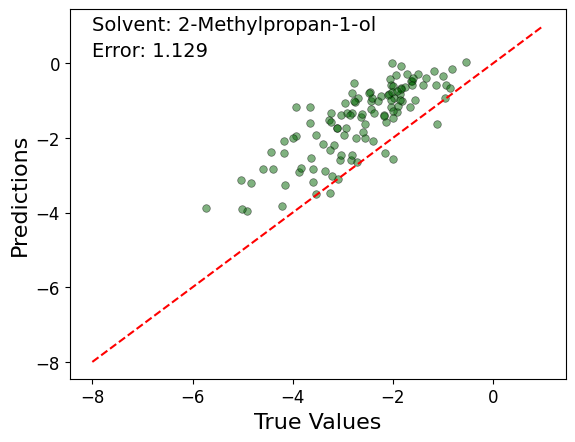

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


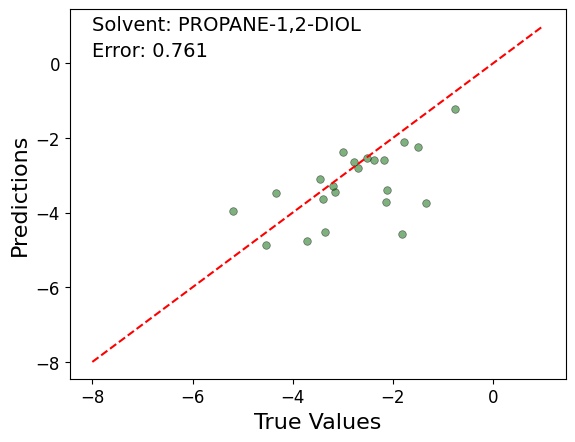

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


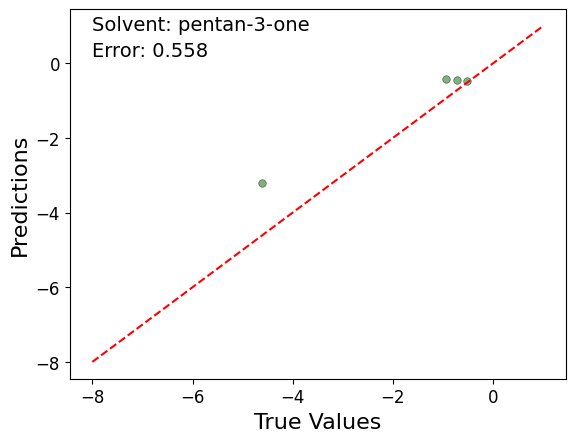

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


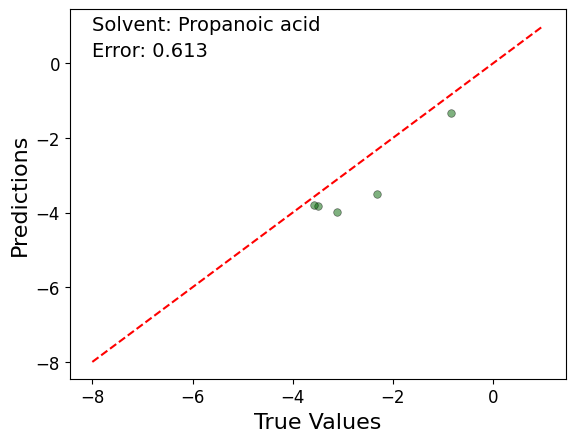

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


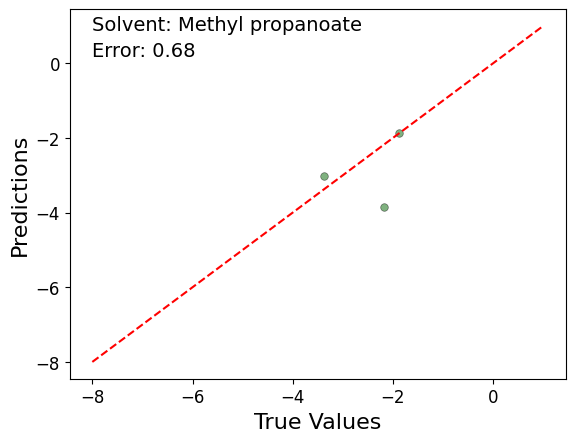

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


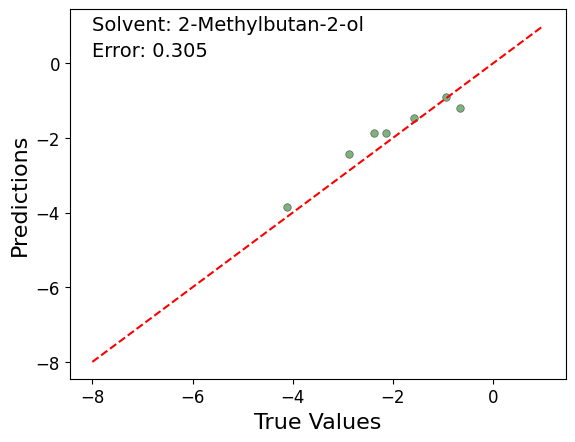

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


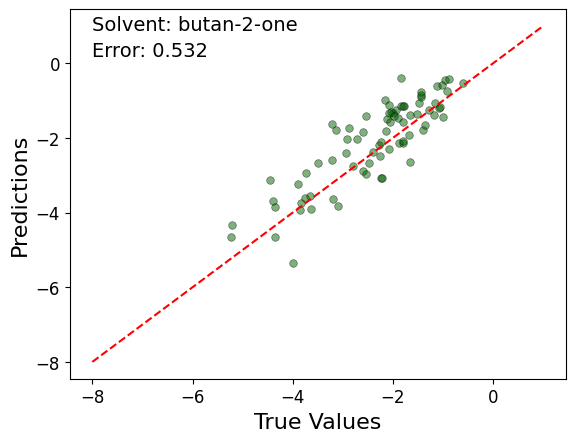

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


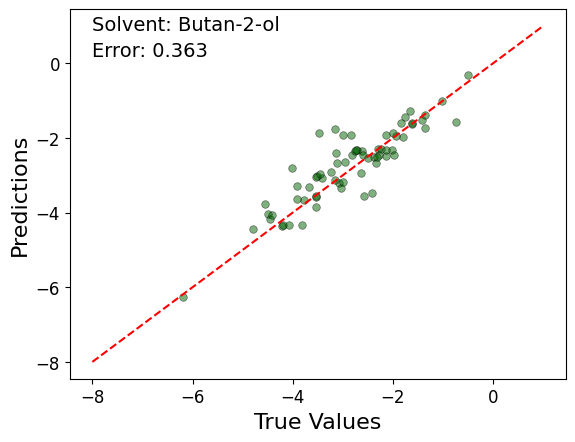

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


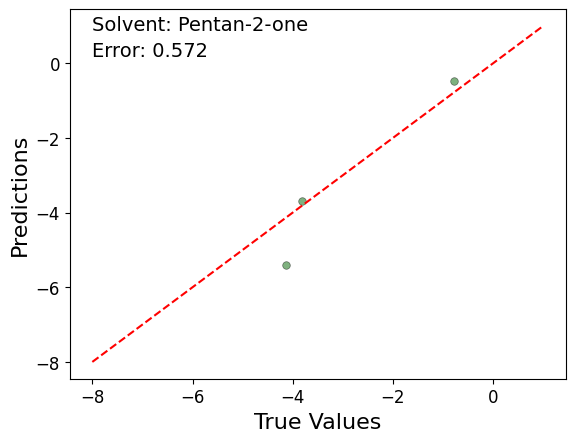

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


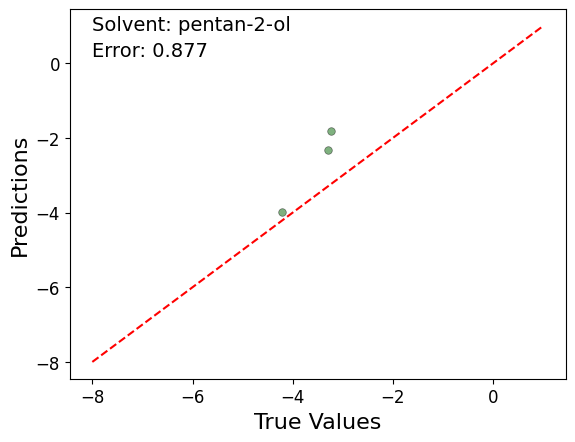

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


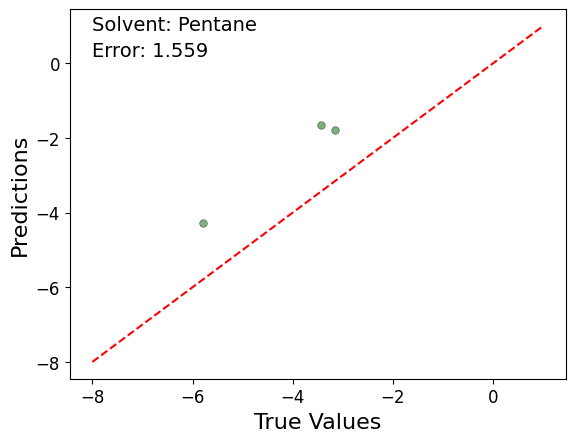

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


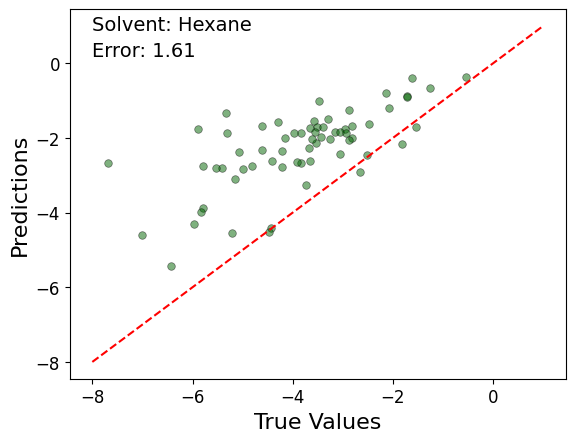

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


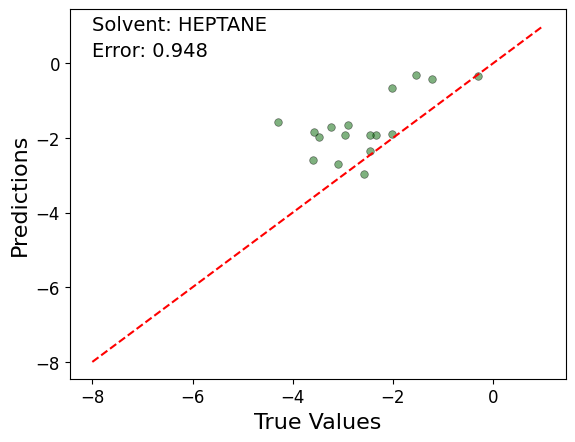

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


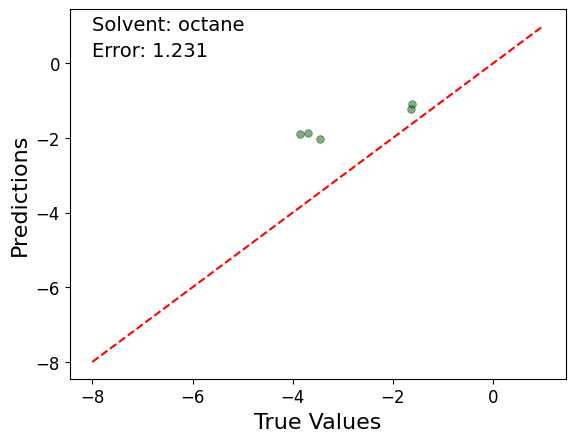

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


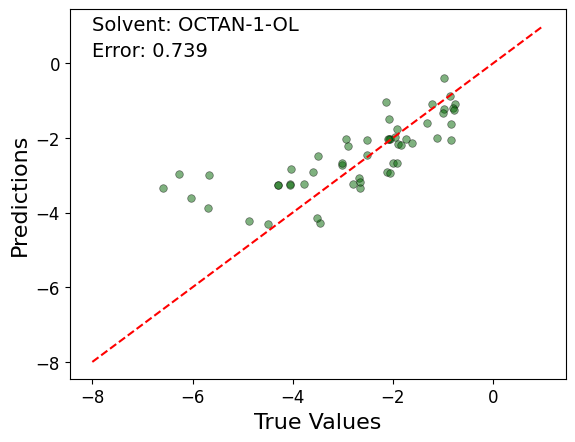

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


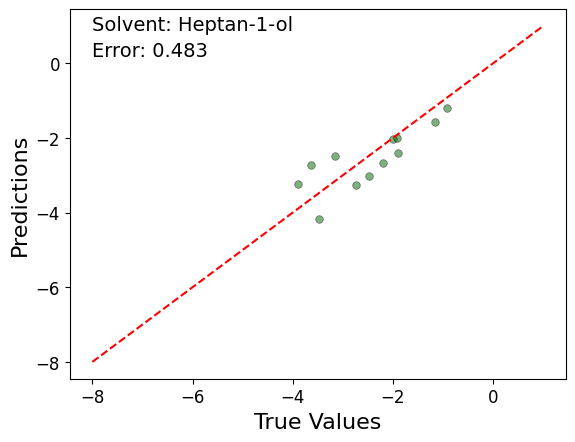

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


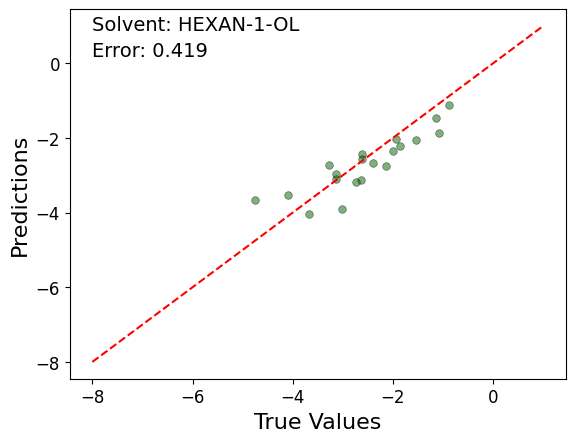

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


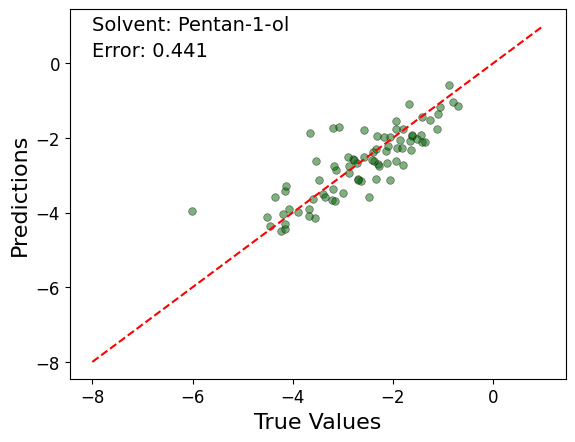

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


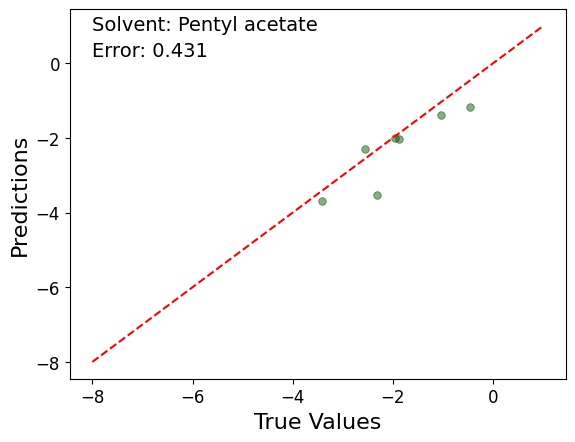

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


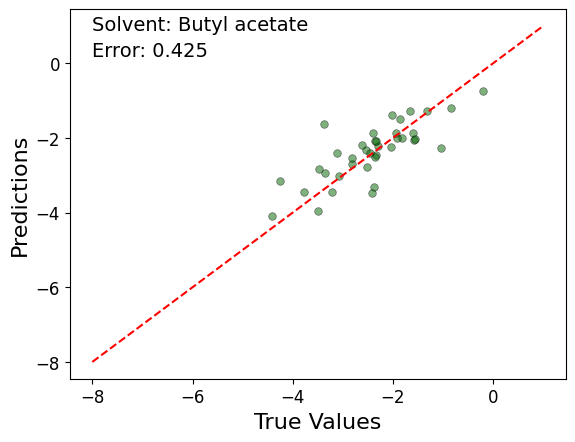

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


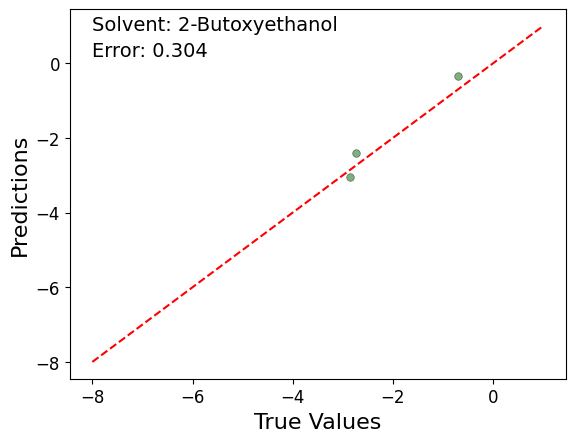

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


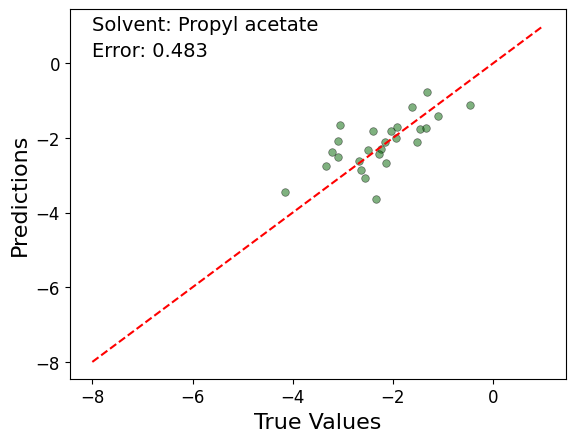

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


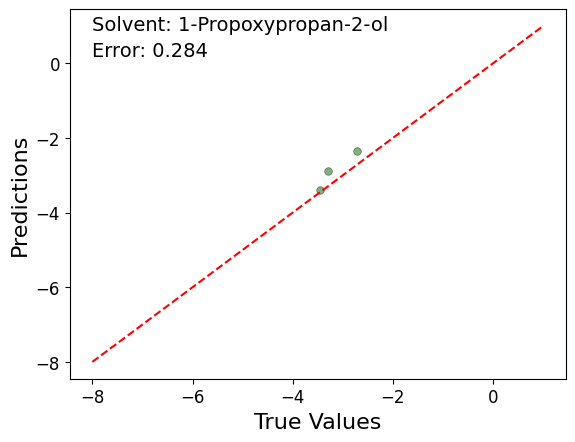

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


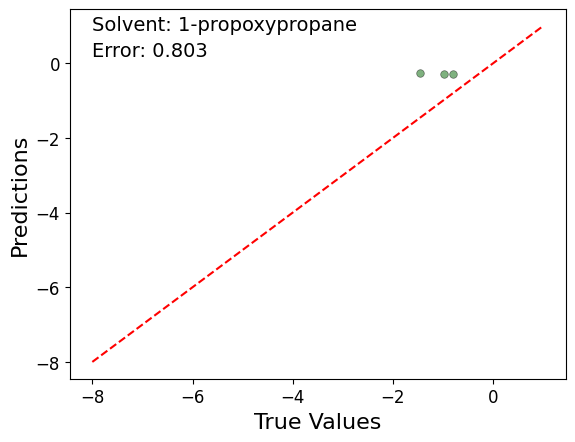

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


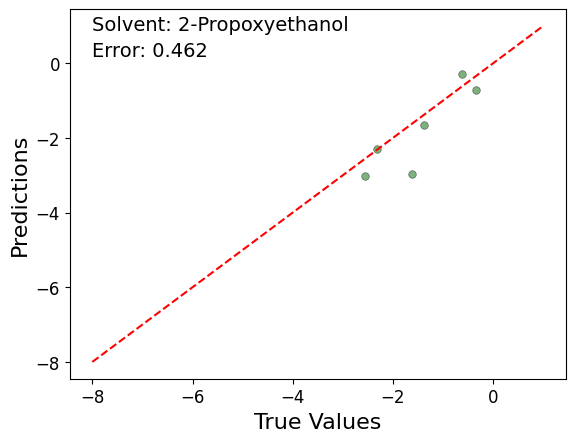

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


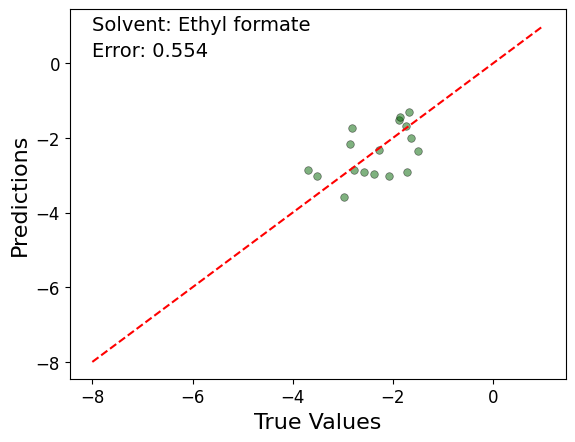

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


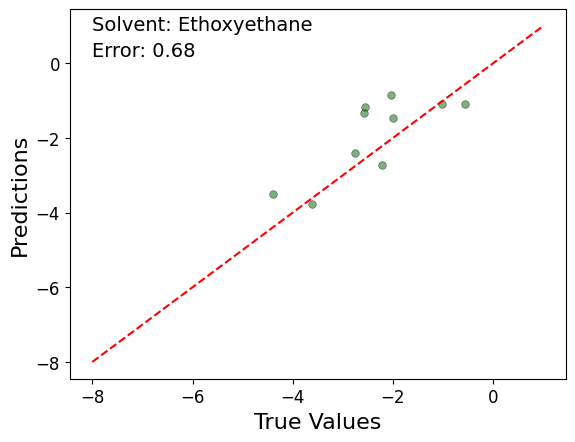

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


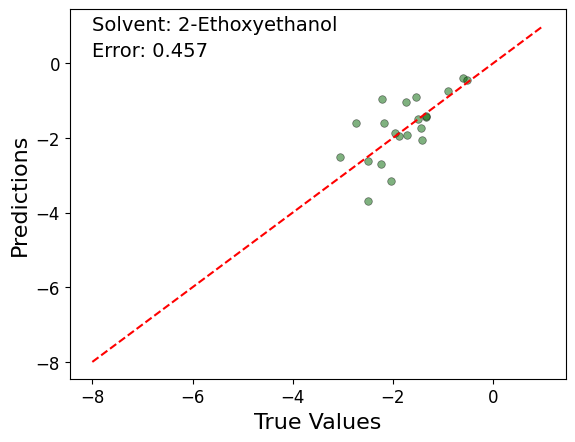

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


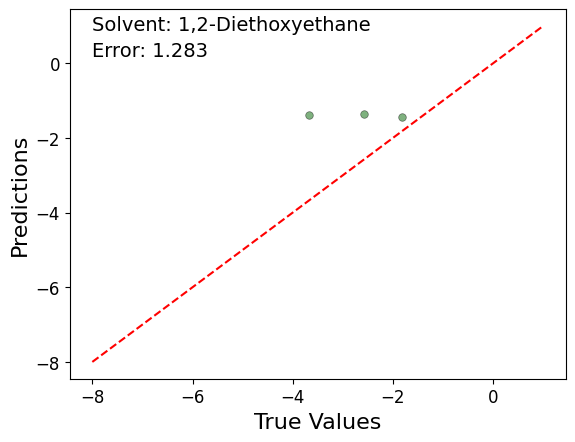

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


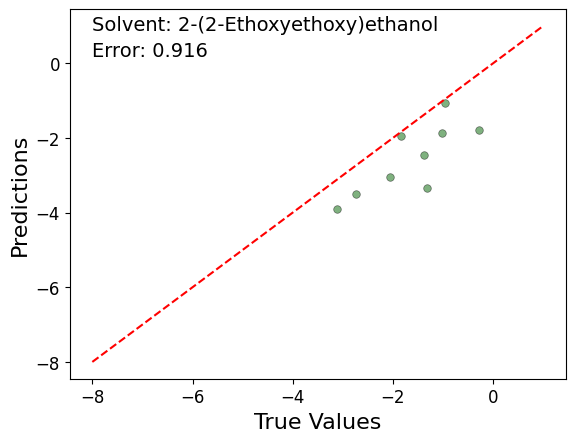

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


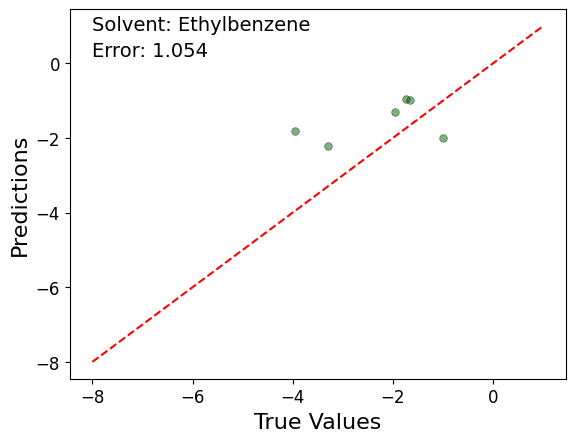

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


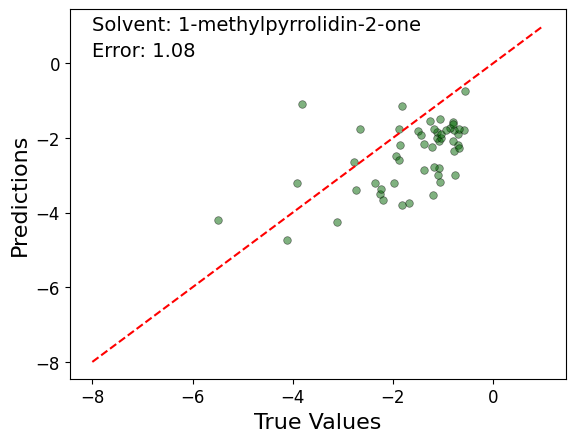

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


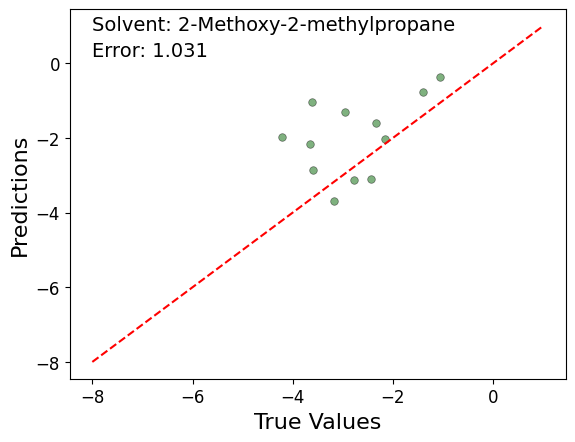

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


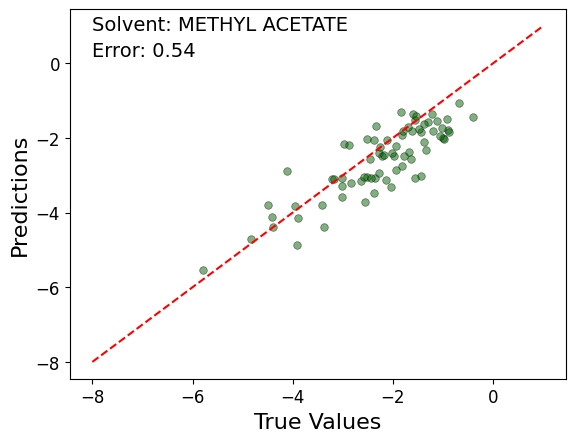

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


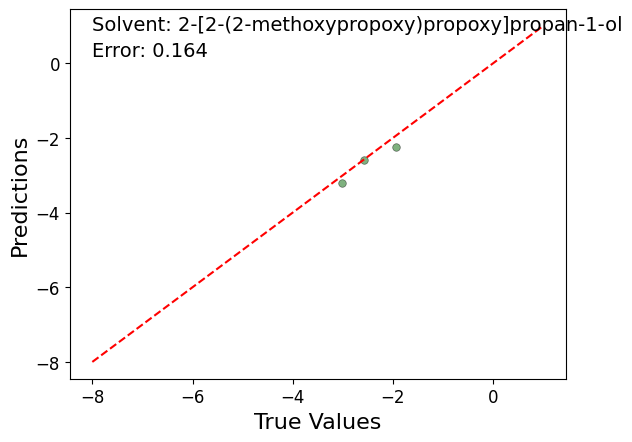

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


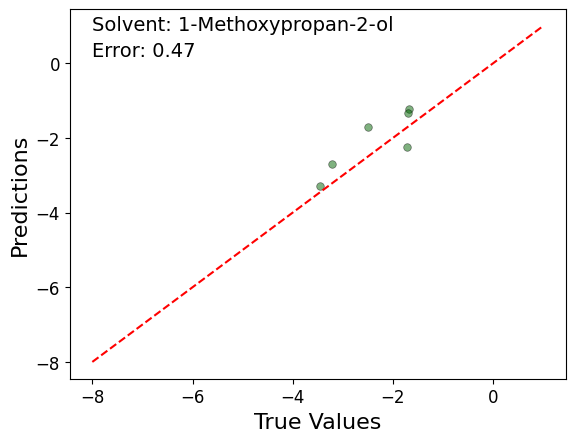

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


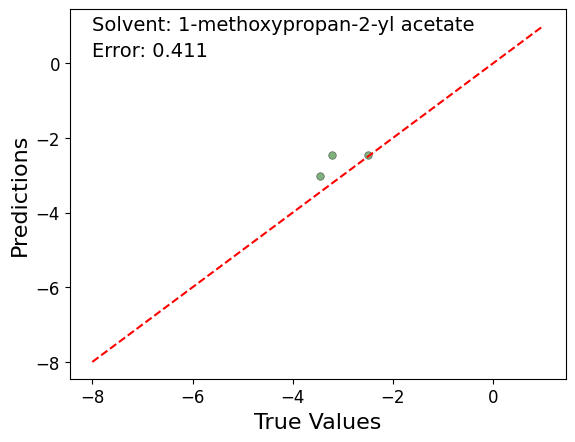

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


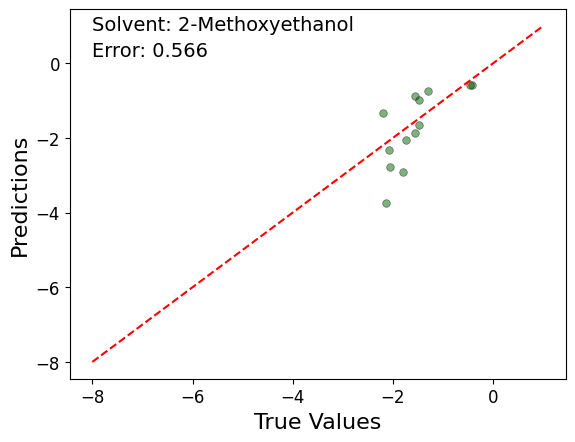

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


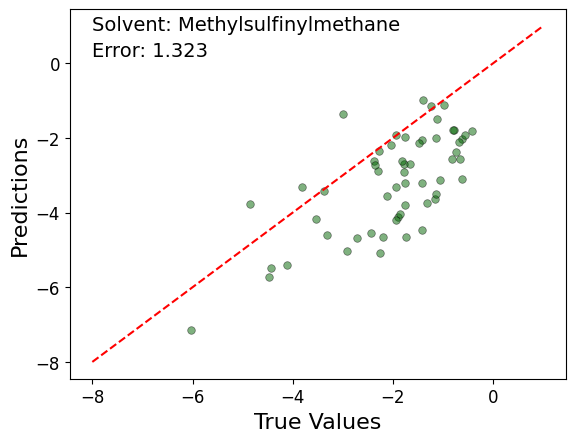

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


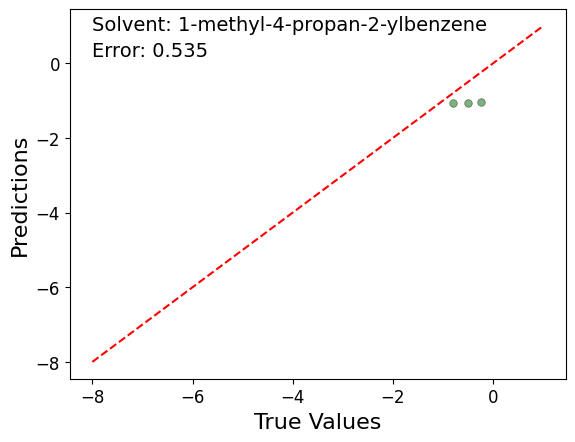

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


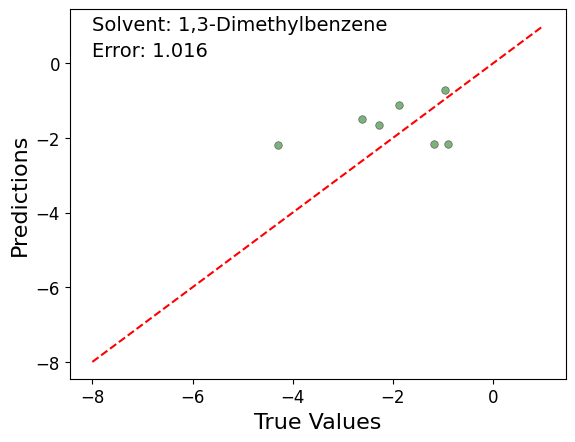

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


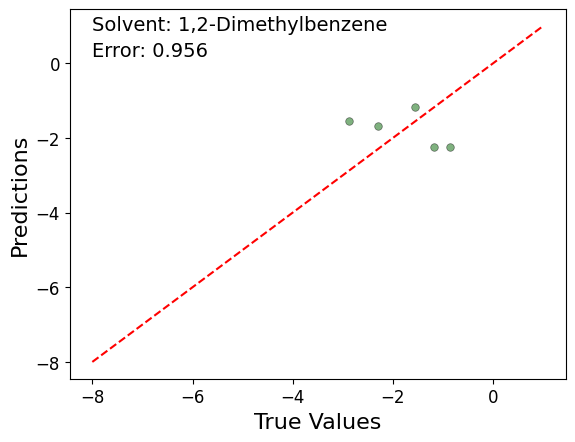

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


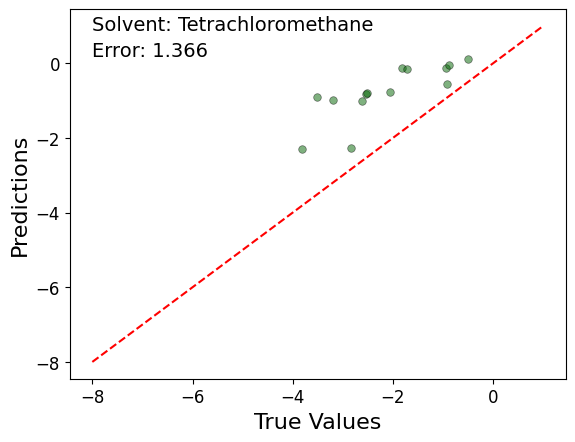

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


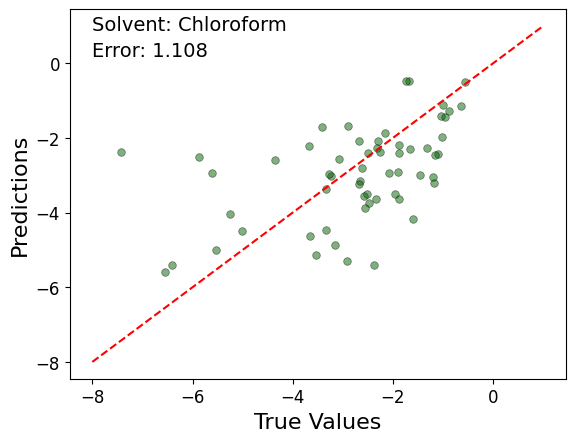

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


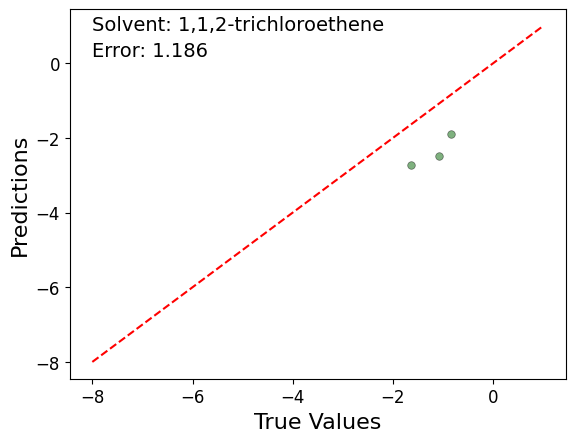

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


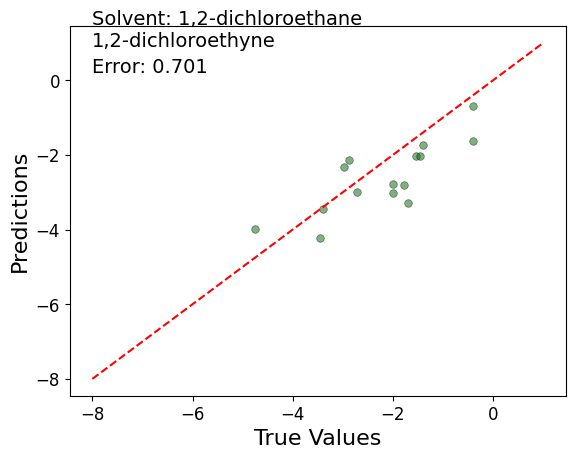

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


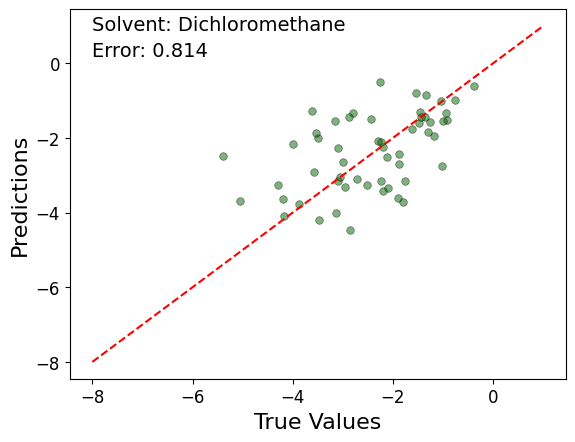

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


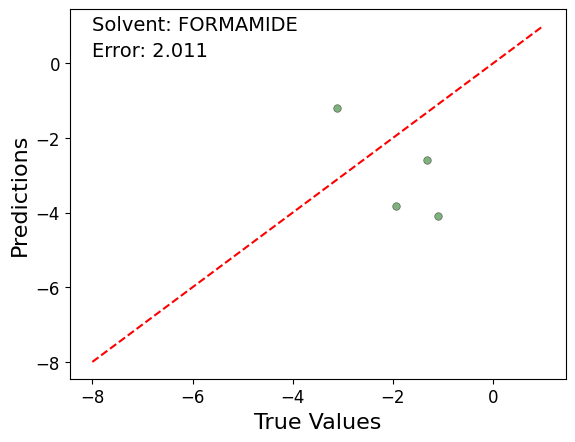

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


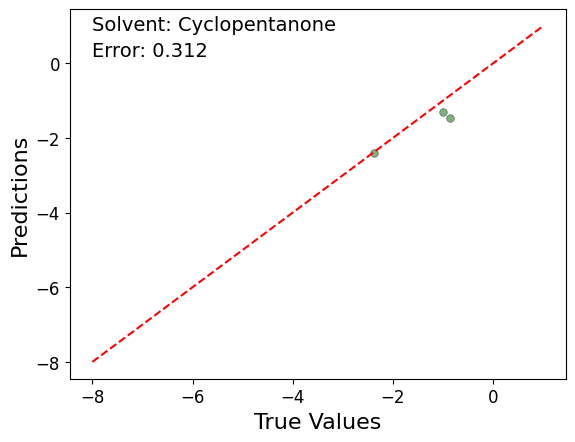

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


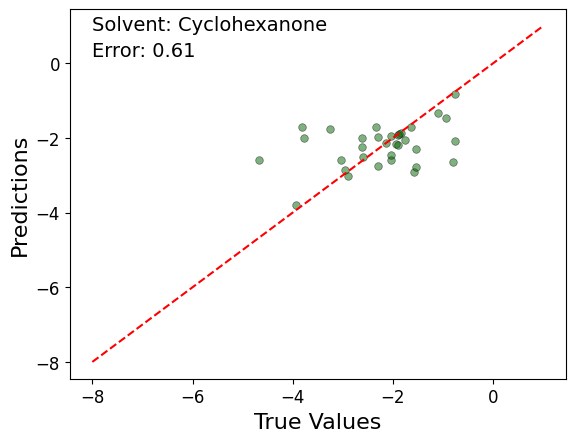

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


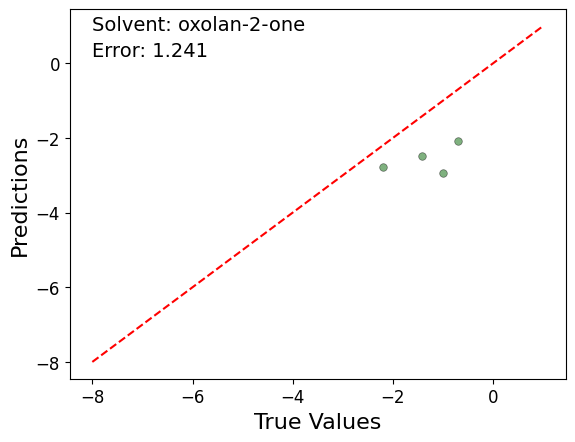

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


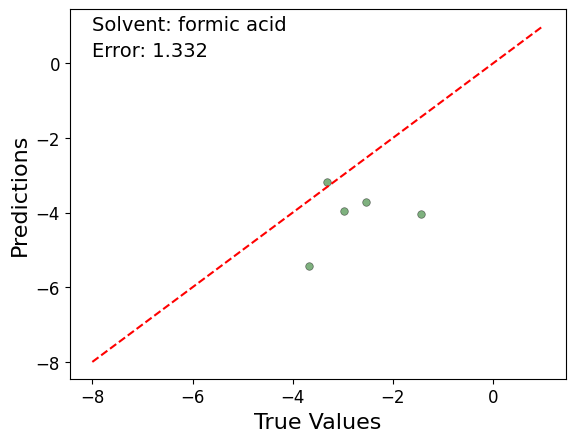

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


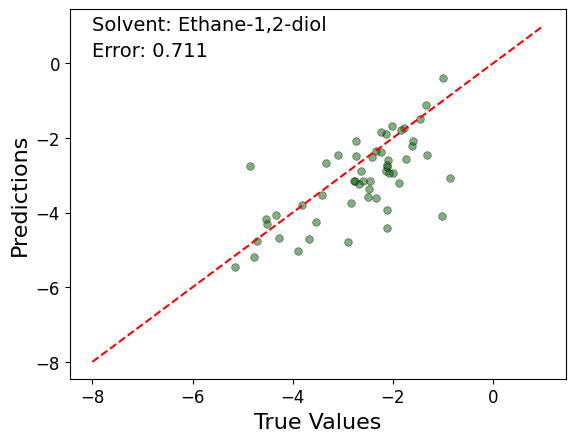

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


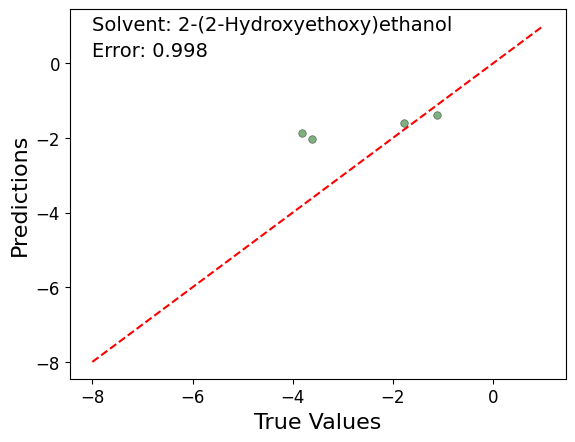

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


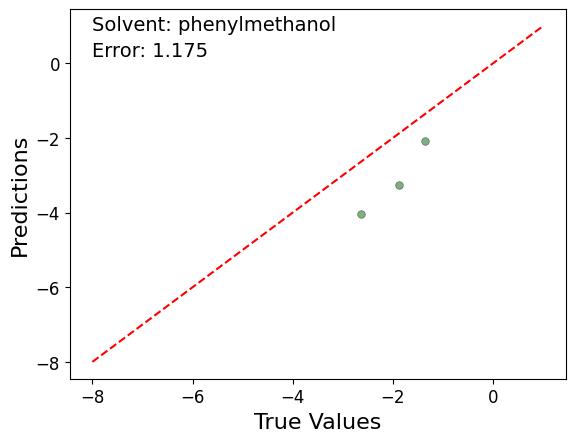

/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


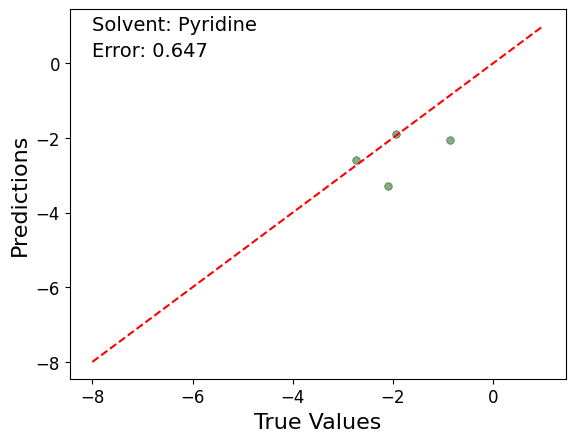

In [ ]:
y_preda = []

import os
from zipfile import ZipFile
for i in range(len(df_sorted)):
    a = df_sorted.at[i, "Smiles_Solvent"]
    name = df_sorted.at[i ,"Solvent_Name"]
    df_temp = df[df['Smiles_Solvent'] == a]

    df_temp.to_csv(f"testsolvents_{a}_ok.csv")

    task = ["LogS"]
    featurizer = MolMergerFeaturizer( use_edges = True)
    dataset_file = f"testsolvents_{a}_ok.csv"

    loader = dc.data.CSVLoader(
        tasks = task,
        feature_field = "Smiles_Merged",
        featurizer = featurizer
    )
    dataset = loader.featurize(dataset_file, shard_size = 8192)

    y_pred = model.predict(dataset)
    y_real = dataset.y
    plt.scatter(y_real, y_pred, s=30, alpha=0.5, color="darkgreen", edgecolor='black', linewidth=0.5)
    plt.plot([-8,1], [-8,1], linestyle = "dashed", color = "red" )
    # plt.plot([0,1], [0,1], linestyle = "dashed", color = "white" )
    plt.xlabel('True Values', fontsize = 16)
    plt.ylabel('Predictions', fontsize = 16)
    r2 = model.evaluate(dataset, metrics)
    y_predy = np.concatenate(y_pred, axis=0)
    y_realy = np.concatenate(y_real, axis=0)
    y_predy = y_predy.tolist()
    y_realy = y_realy.tolist()
    y_preda.append(y_predy)
    a = "Error: "+ str(round((sum(abs(y_realy[i] - y_predy[i]) for i in range(len(y_realy))))/len(y_real), 3))
    namer = "Solvent: "+ str(name)
    plt.text(-8, 0.2, a, fontsize=14, color='black')
    plt.text(-8, 0.9, namer, fontsize=14, color='black')
    plt.tick_params(axis='both', which='both')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.savefig(f'plot_for_{str(name)}.png')
    plt.show()
    plt.close()


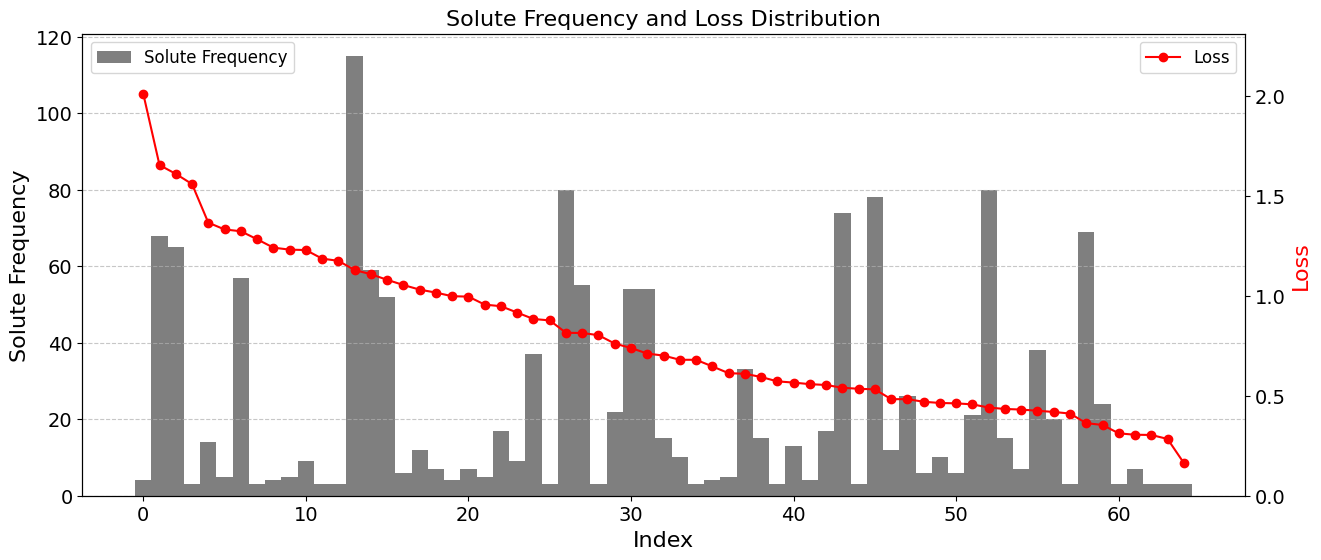

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar([i for i in range(len(df_sorted))], df_sorted["solute_freq"].tolist(), width=1, color="black", alpha=0.5, label="Solute Frequency")

ax2 = ax.twinx()
ax2.plot([i for i in range(len(df_sorted))], (df_sorted["Loss"]).tolist(), color="red", label="Loss", marker='o')
a = 16

ax.set_xlabel("Index", fontsize=a)
ax.set_ylabel("Solute Frequency", color="black", fontsize=a)
ax2.set_ylabel("Loss", color="red", fontsize=a)
plt.title("Solute Frequency and Loss Distribution", fontsize=a)
ax2.set_ylim(0, 0.3 + max(df_sorted["Loss"]))

ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

ax.legend(loc="upper left", fontsize=12)
ax2.legend(loc="upper right", fontsize=12)

ax.grid(axis="y", linestyle="--", alpha=0.7)
ax2.grid(False)
plt.savefig("loss by freq.png")
plt.show()



# Shap Computation

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.1 MB/s eta 0:00:00


### Shapley values with R2

In [ ]:
shaps_node_r2 = []
shaps_node_rmse = []
for i in range(32):
    print(f"Evaluating for feature {i}")
    def _construct_atom_feature(atom: RDKitAtom, h_bond_infos: List[Tuple[int, str]], i) -> np.ndarray:
        atom_type = get_atom_type_one_hot(atom)
        formal_charge = get_atom_formal_charge(atom)
        hybridization = get_atom_hybridization_one_hot(atom)
        acceptor_donor = get_atom_hydrogen_bonding_one_hot(atom, h_bond_infos)
        aromatic = get_atom_is_in_aromatic_one_hot(atom)
        degree = get_atom_total_degree_one_hot(atom)
        total_num_Hs = get_atom_total_num_Hs_one_hot(atom)
        chirality = get_atom_chirality_one_hot(atom)

        atom_feat = np.concatenate([
            atom_type, formal_charge, hybridization, acceptor_donor, aromatic,
            degree, total_num_Hs, chirality
        ])
        if i != 10:
            atom_feat[i] = np.random.choice([0, 1])
        else:
            atom_feat[i] = np.random.choice([0,1,-1])

        return atom_feat


    def _construct_bond_feature(bond: RDKitBond, dist_matrix) -> np.ndarray:

        bond_type = get_bond_type_one_hot(bond)
        same_ring = get_bond_is_in_same_ring_one_hot(bond)
        conjugated = get_bond_is_conjugated_one_hot(bond)
        stereo = get_bond_stereo_one_hot(bond)
        dist = get_bond_graph_distance_one_hot(bond, graph_dist_matrix = dist_matrix)
        return np.concatenate([bond_type, same_ring, conjugated, stereo, dist])



    class MolMergerFeaturizer_Shap(MolecularFeaturizer):

        def __init__(self,
                    i,
                    use_edges: bool = False):

            self.use_edges = use_edges
            self.i = i

        def _featurize(self, datapoint: RDKitMol, **kwargs) -> GraphData:

            assert datapoint.GetNumAtoms() > 1
            if 'mol' in kwargs:
                datapoint = kwargs.get("mol")
                raise DeprecationWarning(
                    'Mol is being phased out as a parameter, please pass "datapoint" instead.'
                )


            # construct atom (node) feature
            h_bond_infos = construct_hydrogen_bonding_info(datapoint)
            dist_matrix = Chem.GetDistanceMatrix(datapoint)
            i = self.i
            atom_features = np.asarray(
                [
                    _construct_atom_feature(atom, h_bond_infos, i)
                    for atom in datapoint.GetAtoms()
                ],
                dtype=float,
            )

            # construct edge (bond) index
            src, dest = [], []
            for bond in datapoint.GetBonds():
                # add edge list considering a directed graph
                start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
                src += [start, end]
                dest += [end, start]

            # construct edge (bond) feature
            bond_features = None
            if self.use_edges:
                features = []
                for bond in datapoint.GetBonds():
                    features += 2 * [_construct_bond_feature(bond, dist_matrix)]
                bond_features = np.asarray(features, dtype=float)

            return GraphData(node_features=atom_features,
                            edge_index=np.asarray([src, dest], dtype=int),
                            edge_features=bond_features)


    task = ["LogS"]
    featurizer = MolMergerFeaturizer_Shap(i, use_edges = True)
    dataset_file = "trainset.csv"
    loader = dc.data.CSVLoader(
        tasks = task,
        smiles_field = "Smiles_Merged",
        featurizer = featurizer
    )
    dataset = loader.featurize(dataset_file, shard_size = 8192 )
    splitter = dc.splits.IndexSplitter()
    train , test = splitter.train_test_split(dataset, seed = 42)

    train_score_1 = model.evaluate(test, [metric1])
    train_score_2 = model.evaluate(test, [metric2])
    total_1 = 0.767
    total_2 = 0.789
    shap_1 = round(train_score_1['mean-pearson_r2_score'], 3) - total_1
    shaps_node_r2.append(shap_1)
    shap_2 = round(train_score_2['mean-rms_score'], 3) - total_2
    shaps_node_rmse.append(shap_2)
    print(f"For feature {i}, Shapley value for rmse = {shap_1} and for rmse = {shap_2}")

Evaluating for feature 0


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 0, Shapley value for rmse = -0.259 and for rmse = 0.3769999999999999
Evaluating for feature 1


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 1, Shapley value for rmse = -0.276 and for rmse = 0.3769999999999999
Evaluating for feature 2


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 2, Shapley value for rmse = -0.426 and for rmse = 0.8330000000000001
Evaluating for feature 3


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 3, Shapley value for rmse = -0.01200000000000001 and for rmse = 0.02300000000000002
Evaluating for feature 4


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 4, Shapley value for rmse = -0.08599999999999997 and for rmse = 0.20899999999999996
Evaluating for feature 5


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 5, Shapley value for rmse = -0.10799999999999998 and for rmse = 0.37
Evaluating for feature 6


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 6, Shapley value for rmse = -0.135 and for rmse = 0.41600000000000004
Evaluating for feature 7


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 7, Shapley value for rmse = -0.10799999999999998 and for rmse = 0.533
Evaluating for feature 8


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 8, Shapley value for rmse = -0.529 and for rmse = 2.077
Evaluating for feature 9


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 9, Shapley value for rmse = -0.335 and for rmse = 0.44099999999999995
Evaluating for feature 10


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 10, Shapley value for rmse = -0.424 and for rmse = 0.8609999999999999
Evaluating for feature 11


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 11, Shapley value for rmse = -0.04700000000000004 and for rmse = 0.07699999999999996
Evaluating for feature 12


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 12, Shapley value for rmse = -0.040000000000000036 and for rmse = 0.05599999999999994
Evaluating for feature 13


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 13, Shapley value for rmse = -0.038000000000000034 and for rmse = 0.05499999999999994
Evaluating for feature 14


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 14, Shapley value for rmse = -0.05800000000000005 and for rmse = 0.139
Evaluating for feature 15


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 15, Shapley value for rmse = -0.04400000000000004 and for rmse = 0.05999999999999994
Evaluating for feature 16


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 16, Shapley value for rmse = -0.040000000000000036 and for rmse = 0.06299999999999994
Evaluating for feature 17


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 17, Shapley value for rmse = -0.22799999999999998 and for rmse = 0.354
Evaluating for feature 18


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 18, Shapley value for rmse = -0.03300000000000003 and for rmse = 0.06099999999999994
Evaluating for feature 19


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 19, Shapley value for rmse = -0.014000000000000012 and for rmse = 0.020000000000000018
Evaluating for feature 20


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 20, Shapley value for rmse = -0.02200000000000002 and for rmse = 0.027999999999999914
Evaluating for feature 21


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 21, Shapley value for rmse = -0.11299999999999999 and for rmse = 0.17199999999999993
Evaluating for feature 22


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 22, Shapley value for rmse = -0.04600000000000004 and for rmse = 0.06299999999999994
Evaluating for feature 23


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 23, Shapley value for rmse = -0.006000000000000005 and for rmse = -0.0030000000000000027
Evaluating for feature 24


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 24, Shapley value for rmse = -0.050000000000000044 and for rmse = 0.07299999999999995
Evaluating for feature 25


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 25, Shapley value for rmse = -0.08199999999999996 and for rmse = 0.131
Evaluating for feature 26


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 26, Shapley value for rmse = -0.29600000000000004 and for rmse = 0.473
Evaluating for feature 27


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 27, Shapley value for rmse = -0.06900000000000006 and for rmse = 0.11399999999999999
Evaluating for feature 28


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 28, Shapley value for rmse = -0.05400000000000005 and for rmse = 0.09699999999999998
Evaluating for feature 29


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 29, Shapley value for rmse = -0.009000000000000008 and for rmse = 0.025999999999999912
Evaluating for feature 30


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 30, Shapley value for rmse = -0.04600000000000004 and for rmse = 0.10399999999999998
Evaluating for feature 31


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 31, Shapley value for rmse = -0.11199999999999999 and for rmse = 0.44800000000000006


### Shapley values with RMSE

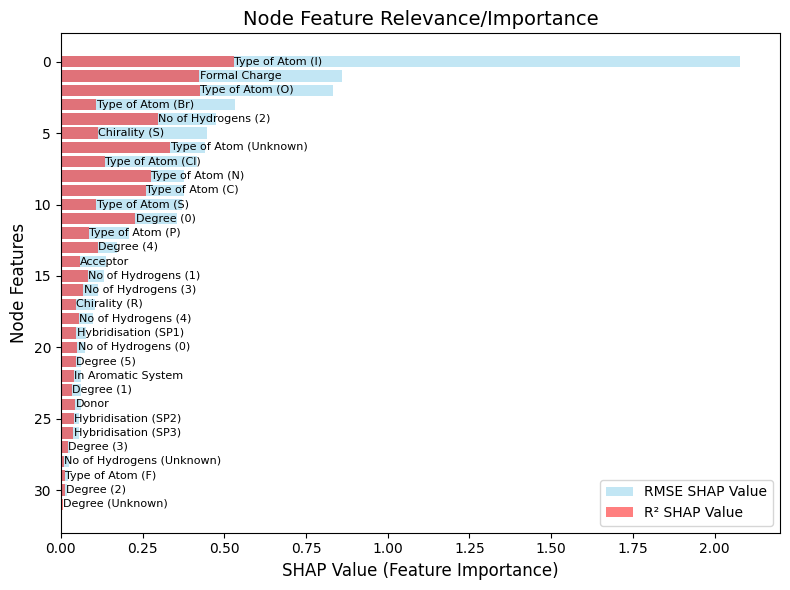

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming shapley is your array containing the SHAP values for each of the 32 features
# Example: shapley = np.array([...])

# Feature names based on the order in _construct_atom_feature function
node_feature_names = [
    "Type of Atom (C)",
    "Type of Atom (N)",
    "Type of Atom (O)",
    "Type of Atom (F)",
    "Type of Atom (P)",
    "Type of Atom (S)",
    "Type of Atom (Cl)",
    "Type of Atom (Br)",
    "Type of Atom (I)",
    "Type of Atom (Unknown)",
    "Formal Charge",
    "Hybridisation (SP1)",
    "Hybridisation (SP2)",
    "Hybridisation (SP3)",
    "Acceptor",
    "Donor",
    "In Aromatic System",
    "Degree (0)",
    "Degree (1)",
    "Degree (2)",
    "Degree (3)",
    "Degree (4)",
    "Degree (5)",
    "Degree (Unknown)",
    "No of Hydrogens (0)",
    "No of Hydrogens (1)",
    "No of Hydrogens (2)",
    "No of Hydrogens (3)",
    "No of Hydrogens (4)",
    "No of Hydrogens (Unknown)",
    "Chirality (R)",
    "Chirality (S)"
]


# Example SHAP values array (replace this with your actual SHAP values)
shapley_node_rmse = np.asarray(shaps_node_rmse)  # Replace with your SHAP values
shapley_node_rmse = 1 * shapley_node_rmse

shapley_node_r2 = np.asarray(shaps_node_r2)  # Replace with your SHAP values
shapley_node_r2 = -1 * shapley_node_r2

# Sorting the SHAP values and corresponding feature names
sorted_indices_node = np.argsort(shapley_node_rmse)[::-1]
sorted_shapley_node_rmse = shapley_node_rmse[sorted_indices_node]
sorted_shapley_node_r2 = shapley_node_r2[sorted_indices_node]
sorted_node_feature_names = np.array(node_feature_names)[sorted_indices_node]

# Plotting
plt.figure(figsize=(8, 6))  # Adjusting the figure size for a more compact display
bar_width = 0.8  # Adjusting bar width for better spacing
y_pos = np.arange(len(sorted_shapley_node_rmse))
plt.xlim((0,2.2))
# Plotting RMSE SHAP values
bar_edges_rmse = plt.barh(y_pos, sorted_shapley_node_rmse, bar_width, color='skyblue', alpha=0.5, label='RMSE SHAP Value')
# Plotting R² SHAP values
bar_edges_r2 = plt.barh(y_pos, sorted_shapley_node_r2, bar_width, color='red', alpha=0.5, label='R² SHAP Value')

# Annotating bars with feature names
for i in range(len(sorted_shapley_node_rmse)):
    # plt.text(sorted_shapley_node_rmse[i], y_pos[i] - bar_width/2, sorted_node_feature_names[i], ha='left', va='center', fontsize=8)
    plt.text(sorted_shapley_node_r2[i]+0.001, y_pos[i], sorted_node_feature_names[i], ha='left', va='center', fontsize=8)

plt.xlabel('SHAP Value (Feature Importance)', fontsize=12)
plt.ylabel('Node Features', fontsize=12)
plt.title('Node Feature Relevance/Importance', fontsize=14)
plt.gca().invert_yaxis()  # To display the most important feature at the top

# Adding legend
plt.legend(loc = "lower right")

plt.tight_layout()  # Ensures everything fits without overlapping
plt.savefig("Shap_node")
plt.show()



In [ ]:
shaps_edges_r2 = []
shaps_edges_rmse = []
for i in range(11):
    print(f"Evaluating for edge_feature {i}")
    def _construct_atom_feature(atom: RDKitAtom, h_bond_infos: List[Tuple[int, str]]) -> np.ndarray:
        atom_type = get_atom_type_one_hot(atom)
        formal_charge = get_atom_formal_charge(atom)
        hybridization = get_atom_hybridization_one_hot(atom)
        acceptor_donor = get_atom_hydrogen_bonding_one_hot(atom, h_bond_infos)
        aromatic = get_atom_is_in_aromatic_one_hot(atom)
        degree = get_atom_total_degree_one_hot(atom)
        total_num_Hs = get_atom_total_num_Hs_one_hot(atom)
        chirality = get_atom_chirality_one_hot(atom)

        atom_feat = np.concatenate([
            atom_type, formal_charge, hybridization, acceptor_donor, aromatic,
            degree, total_num_Hs, chirality
        ])
        return atom_feat


    def _construct_bond_feature(bond: RDKitBond, dist_matrix, i) -> np.ndarray:

        bond_type = get_bond_type_one_hot(bond)
        same_ring = get_bond_is_in_same_ring_one_hot(bond)
        conjugated = get_bond_is_conjugated_one_hot(bond)
        stereo = get_bond_stereo_one_hot(bond)
        dist = get_bond_graph_distance_one_hot(bond, graph_dist_matrix = dist_matrix) # This is superflous
        edge_feat =  np.concatenate([bond_type, same_ring, conjugated, stereo, dist])
        edge_feat[i] = np.random.choice([0,1,-1])
        return edge_feat


    class MolMergerFeaturizer_Shap(MolecularFeaturizer):

        def __init__(self,
                    i,
                    use_edges: bool = False):

            self.use_edges = use_edges
            self.i = i

        def _featurize(self, datapoint: RDKitMol, **kwargs) -> GraphData:

            assert datapoint.GetNumAtoms() > 1
            if 'mol' in kwargs:
                datapoint = kwargs.get("mol")
                raise DeprecationWarning(
                    'Mol is being phased out as a parameter, please pass "datapoint" instead.'
                )


            # construct atom (node) feature
            h_bond_infos = construct_hydrogen_bonding_info(datapoint)
            dist_matrix = Chem.GetDistanceMatrix(datapoint)
            i = self.i
            atom_features = np.asarray(
                [
                    _construct_atom_feature(atom, h_bond_infos)
                    for atom in datapoint.GetAtoms()
                ],
                dtype=float,
            )

            # construct edge (bond) index
            src, dest = [], []
            for bond in datapoint.GetBonds():
                # add edge list considering a directed graph
                start, end = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
                src += [start, end]
                dest += [end, start]

            # construct edge (bond) feature
            bond_features = None
            if self.use_edges:
                features = []
                for bond in datapoint.GetBonds():
                    features += 2 * [_construct_bond_feature(bond, dist_matrix, i)]
                bond_features = np.asarray(features, dtype=float)

            return GraphData(node_features=atom_features,
                            edge_index=np.asarray([src, dest], dtype=int),
                            edge_features=bond_features)


    task = ["LogS"]
    featurizer = MolMergerFeaturizer_Shap(i, use_edges = True)
    dataset_file = "trainset.csv"
    loader = dc.data.CSVLoader(
        tasks = task,
        smiles_field = "Smiles_Merged",
        featurizer = featurizer
    )
    dataset = loader.featurize(dataset_file, shard_size = 8192 )
    splitter = dc.splits.IndexSplitter()
    train , test = splitter.train_test_split(dataset, seed = 42)

    train_score_1 = model.evaluate(test, [metric1])
    train_score_2 = model.evaluate(test, [metric2])
    total_1 = 0.767
    total_2 = 0.789
    shap_1 = round(train_score_1['mean-pearson_r2_score'], 3) - total_1
    shaps_edges_r2.append(shap_1)
    shap_2 = round(train_score_2['mean-rms_score'], 3) - total_2
    shaps_edges_rmse.append(shap_2)
    print(f"For feature {i}, Shapley value for rmse = {shap_1} and for rmse = {shap_2}")

Evaluating for edge_feature 0


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 0, Shapley value for rmse = -0.02200000000000002 and for rmse = 0.05999999999999994
Evaluating for edge_feature 1


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 1, Shapley value for rmse = -0.006000000000000005 and for rmse = 0.008000000000000007
Evaluating for edge_feature 2


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 2, Shapley value for rmse = -0.09899999999999998 and for rmse = 0.17999999999999994
Evaluating for edge_feature 3


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 3, Shapley value for rmse = -0.0040000000000000036 and for rmse = 0.0040000000000000036
Evaluating for edge_feature 4


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 4, Shapley value for rmse = -0.04800000000000004 and for rmse = 0.07799999999999996
Evaluating for edge_feature 5


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 5, Shapley value for rmse = -0.006000000000000005 and for rmse = 0.009000000000000008
Evaluating for edge_feature 6


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 6, Shapley value for rmse = -0.0020000000000000018 and for rmse = 0.006000000000000005
Evaluating for edge_feature 7


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 7, Shapley value for rmse = 0.0 and for rmse = 0.0
Evaluating for edge_feature 8


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 8, Shapley value for rmse = -0.03500000000000003 and for rmse = 0.04799999999999993
Evaluating for edge_feature 9


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 9, Shapley value for rmse = -0.03600000000000003 and for rmse = 0.05399999999999994
Evaluating for edge_feature 10


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 10, Shapley value for rmse = 0.0 and for rmse = 0.0
Evaluating for edge_feature 11


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


For feature 11, Shapley value for rmse = -0.0010000000000000009 and for rmse = 0.0010000000000000009
Evaluating for edge_feature 12


/usr/local/lib/python3.10/dist-packages/deepchem/data/data_loader.py:161: FutureWarning: featurize() is deprecated and has been renamed to create_dataset().featurize() will be removed in DeepChem 3.0
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
shaps_edges_r2 = shaps_edges_r2[:11]
shaps_edges_rmse = shaps_edges_rmse[:11]

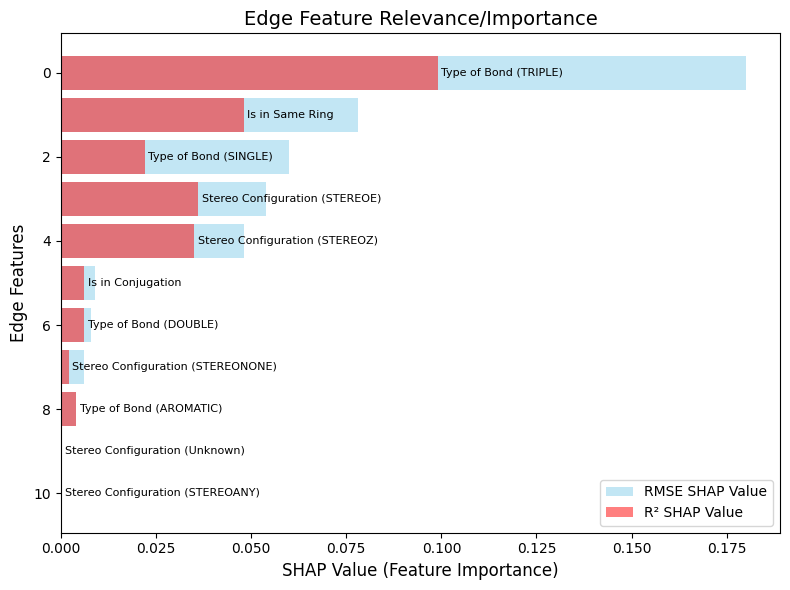

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Edge feature names based on the order in _construct_bond_feature function
edge_feature_names = [
    "Type of Bond (SINGLE)",
    "Type of Bond (DOUBLE)",
    "Type of Bond (TRIPLE)",
    "Type of Bond (AROMATIC)",
    "Is in Same Ring",
    "Is in Conjugation",
    "Stereo Configuration (STEREONONE)",
    "Stereo Configuration (STEREOANY)",
    "Stereo Configuration (STEREOZ)",
    "Stereo Configuration (STEREOE)",
    "Stereo Configuration (Unknown)"
]

# Example SHAP values array (replace this with your actual SHAP values)
shapley_edges_rmse = np.asarray(shaps_edges_rmse)  # Replace with your SHAP values
shapley_edges_rmse = 1 * shapley_edges_rmse

shapley_edges_r2 = np.asarray(shaps_edges_r2)  # Replace with your SHAP values
shapley_edges_r2 = -1 * shapley_edges_r2

# Sorting the SHAP values and corresponding feature names
sorted_indices_edges = np.argsort(shapley_edges_rmse)[::-1]
sorted_shapley_edges_rmse = shapley_edges_rmse[sorted_indices_edges]
sorted_shapley_edges_r2 = shapley_edges_r2[sorted_indices_edges]
sorted_edge_feature_names = np.array(edge_feature_names)[sorted_indices_edges]

# Plotting
plt.figure(figsize=(8, 6))  # Adjusting the figure size for a more compact display
bar_width = 0.8  # Adjusting bar width for better spacing
y_pos = np.arange(len(sorted_shapley_edges_rmse))

# Plotting RMSE SHAP values
bar_edges_rmse = plt.barh(y_pos, sorted_shapley_edges_rmse, bar_width, color='skyblue', alpha=0.5, label='RMSE SHAP Value')
# Plotting R² SHAP values
bar_edges_r2 = plt.barh(y_pos, sorted_shapley_edges_r2, bar_width, color='red', alpha=0.5, label='R² SHAP Value')

# Annotating bars with feature names
for i in range(len(sorted_shapley_edges_rmse)):
    # plt.text(sorted_shapley_edges_rmse[i], y_pos[i] - bar_width/2, sorted_edge_feature_names[i], ha='left', va='center', fontsize=8)
    plt.text(sorted_shapley_edges_r2[i] + 0.001, y_pos[i], sorted_edge_feature_names[i], ha='left', va='center', fontsize=8)

plt.xlabel('SHAP Value (Feature Importance)', fontsize=12)
plt.ylabel('Edge Features', fontsize=12)
plt.title('Edge Feature Relevance/Importance', fontsize=14)
plt.gca().invert_yaxis()  # To display the most important feature at the top

# Adding legend
plt.legend(loc = "lower right")

plt.tight_layout()  # Ensures everything fits without overlapping
plt.savefig("Shap_edge")
plt.show()
